In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import os

In [2]:
os.getcwd()
os.chdir("C:/Users/14157/Data Analysis/SFPD_2018-Present")

In [3]:
sfpd = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv', parse_dates = [0,1], infer_datetime_format=True)
sfpd

Incident Datetime Incident Date Incident Time  Incident Year  \
0      2021-08-03 10:00:00    2021-08-03         10:00           2021   
1      2021-11-23 07:38:00    2021-11-23         07:38           2021   
2      2021-07-04 09:15:00    2021-07-04         09:15           2021   
3      2021-10-15 08:49:00    2021-10-15         08:49           2021   
4      2021-08-24 05:17:00    2021-08-24         05:17           2021   
...                    ...           ...           ...            ...   
707626 2023-03-13 02:28:00    2023-03-13         14:28           2023   
707627 2023-03-13 05:30:00    2023-03-13         17:30           2023   
707628 2023-03-12 06:00:00    2023-03-12         18:00           2023   
707629 2023-03-07 06:30:00    2023-03-07         18:30           2023   
707630 2023-03-12 04:45:00    2023-03-12         16:45           2023   

       Incident Day of Week         Report Datetime        Row ID  \
0                   Tuesday  2021/08/15 03:40:00 PM  106057809250   
1                   Tuesday  2021/11/23 11:14:00 AM  109461026030   
2                    Sunday  2021/07/04 11:14:00 AM  104877706244   
3                    Friday  2021/10/15 08:49:00 AM  109331362040   
4                   Tuesday  2021/08/24 05:18:00 AM  106324707041   
...                     ...                     ...           ...   
707626               Monday  2023/03/13 02:30:00 PM  125358551040   
707627               Monday  2023/03/13 07:21:00 PM  125369612030   
707628               Sunday  2023/03/12 11:21:00 PM  125339807021   
707629              Tuesday  2023/03/08 09:36:00 AM  125345906374   
707630               Sunday  2023/03/13 01:19:00 AM  125342007021   

        Incident ID  Incident Number   CAD Number  ...   Longitude  \
0           1060578        210520957  212272109.0  ... -122.402708   
1           1094610        210773093  213270579.0  ... -122.430629   
2           1048777        216090059          NaN  ...         NaN   
3           1093313        219002500          NaN  ...         NaN   
4           1063247        210427591          NaN  ...         NaN   
...             ...              ...          ...  ...         ...   
707626      1253585        230177914  230721895.0  ... -122.395944   
707627      1253696        230178859  230722916.0  ... -122.472312   
707628      1253398        230176530  230713067.0  ... -122.430167   
707629      1253459        236045448          NaN  ... -122.414778   
707630      1253420        230176734  230720094.0  ... -122.439657   

                                                 Point Neighborhoods  \
0        POINT (-122.40270815508224 37.78325923532804)          32.0   
1         POINT (-122.4306290861244 37.77303929797831)          26.0   
2                                                  NaN           NaN   
3                                                  NaN           NaN   
4                                                  NaN           NaN   
...                                                ...           ...   
707626   POINT (-122.39594382884452 37.72171587946975)          88.0   
707627  POINT (-122.47231225719086 37.780655826818226)           5.0   
707628   POINT (-122.43016737676395 37.77070918797817)          28.0   
707629   POINT (-122.41477847402237 37.78461294856494)          20.0   
707630   POINT (-122.43965650508086 37.77571358981224)          24.0   

        ESNCAG - Boundary File  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   
...                        ...   
707626                     NaN   
707627                     NaN   
707628                     NaN   
707629                     NaN   
707630                     NaN   

       Central Market/Tenderloin Boundary Polygon - Updated  \
0                                                     NaN     
1                                                     NaN     

In [4]:
pd.options.display.max_columns = 30
pd.options.display.max_rows = 200
pd.options.display.precision=  2

In [5]:
dispatch = pd.read_csv('Law_Enforcement_Dispatched_Calls_for_Service__Closed.csv', parse_dates = [3,4,5,6,7,8],
                       infer_datetime_format = True)

In [6]:
dispatch_all = pd.read_csv('Law_Enforcement_Dispatched_Calls_for_Service__Closed.csv')

In [7]:
dispatch.rename({'cad_number':'CAD Number'}, axis = 'columns', inplace = True)

In [8]:
sfpd = pd.merge(sfpd,dispatch[['CAD Number','onview_flag']],on='CAD Number', how='left')

In [9]:
# Drop columns I'm not gonna use
sfpd = sfpd.drop(columns = ['Latitude', 'Longitude',
       'Point', 'Neighborhoods', 'ESNCAG - Boundary File',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Civic Center Harm Reduction Project Boundary',
       'HSOC Zones as of 2018-06-05', 'Invest In Neighborhoods (IIN) Areas',
       'Current Supervisor Districts', 'Current Police Districts', 'Row ID', 'Incident ID',
       'CNN', 'Supervisor District'])

In [10]:
sfpd['Week'] = sfpd['Incident Datetime'].dt.strftime('%Y-%U')
sfpd['Year Month'] = sfpd['Incident Datetime'].dt.strftime('%Y-%m')
sfpd['Year Month'] = pd.to_datetime(sfpd['Year Month'], format = '%Y-%m')

In [11]:
sfpd['Analysis Neighborhood'] = sfpd['Analysis Neighborhood'].fillna(value = 'No Neighborhood Data')

In [12]:
arrests = sfpd.loc[(sfpd['Resolution'] == 'Cite or Arrest Adult') | (sfpd['Resolution'] == 'Exceptional Adult')]

In [13]:
beforefore = pd.Timestamp(2019,3,17)
covid_starts= pd.Timestamp(2020,3,17)
covid_ends = pd.Timestamp(2021,3,17)
year_ago = pd.Timestamp(2022,3,17)
today = pd.Timestamp(2023,3,17)

def get_period(date):
    if beforefore <= date < covid_starts:
        return 'Before Covid'
    elif covid_starts <= date < covid_ends:
        return 'During Covid'
    elif year_ago <= date < today:
        return 'Most Recent Year'
        
sfpd['Period'] = sfpd['Incident Date'].apply(lambda x: get_period(x))

In [14]:
def get_hour(time):
    return time.split(":")[0]
sfpd['Incident Hour'] = sfpd['Incident Time'].apply(lambda x: get_hour(x))

In [15]:
carceny_sfpd = sfpd.loc[((sfpd['Incident Subcategory'] == 'Larceny - From Vehicle') | 
                         (sfpd['Incident Description'] == 'Burglary, Vehicle (Arrest made)') |
                         (sfpd['Incident Description'] == 'Burglary, Vehicle, Att. (Arrest made)'))]

# How did Covid affect crime in San Francisco?

In [16]:
incidents_before = sfpd.loc[(sfpd['Incident Date'].between(beforefore,covid_starts))]
incidents_now = sfpd.loc[(sfpd['Incident Date'].between(year_ago,today))]
incidents_change = pd.DataFrame()

incidents_change['Year Leading up to Covid'] = incidents_before['Incident Category'].value_counts()
incidents_change['Last Year'] = incidents_now['Incident Category'].value_counts()

incidents_change.loc['Total'] = incidents_change.sum()

incidents_change['% Change'] = ((incidents_change['Last Year'] - incidents_change['Year Leading up to Covid'])/
                             incidents_change['Year Leading up to Covid'])*100
incidents_change

Year Leading up to Covid  \
Larceny Theft                                                  49584   
Other Miscellaneous                                            10620   
Malicious Mischief                                              9239   
Non-Criminal                                                    9099   
Assault                                                         8967   
Burglary                                                        6176   
Motor Vehicle Theft                                             5642   
Warrant                                                         5401   
Lost Property                                                   5337   
Fraud                                                           4629   
Recovered Vehicle                                               4371   
Drug Offense                                                    3656   
Robbery                                                         3619   
Missing Person                                                  3344   
Suspicious Occ                                                  2895   
Disorderly Conduct                                              2768   
Offences Against The Family And Children                        1908   
Traffic Violation Arrest                                        1834   
Miscellaneous Investigation                                     1362   
Other Offenses                                                  1232   
Other                                                           1051   
Weapons Offense                                                  797   
Weapons Carrying Etc                                             751   
Stolen Property                                                  735   
Case Closure                                                     628   
Forgery And Counterfeiting                                       579   
Courtesy Report                                                  522   
Arson                                                            322   
Traffic Collision                                                317   
Prostitution                                                     276   
Civil Sidewalks                                                  245   
Embezzlement                                                     225   
Vandalism                                                        212   
Sex Offense                                                      169   
Fire Report                                                      147   
Vehicle Impounded                                                129   
Suicide                                                           79   
Vehicle Misplaced                                                 78   
Drug Violation                                                    54   
Rape                                                              36   
Suspicious                                                        30   
Homicide                                                          17   
Motor Vehicle Theft?                                              16   
Human Trafficking (A), Commercial Sex Acts                        16   
Liquor Laws                                                       15   
Weapons Offence                                                   10   
Human Trafficking, Commercial Sex Acts                            10   
Gambling                                                           3   
Total                                                         149152   

                                            Last Year  % Change  
Larceny Theft                                   41007    -17.30  
Other Miscellaneous                              8206    -22.73  
Malicious Mischief                               9053     -2.01  
Non-Criminal                                     7488    -17.71  
Assault                                          8684     -3.16  
Burglary                                       

## Assault

In [17]:
assault = sfpd.loc[sfpd['Incident Category'] == 'Assault']
assault = assault.loc[(sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [18]:
assault['Analysis Neighborhood'].isna().sum()

0

In [19]:
assault_before = assault.loc[(assault['Incident Date'].between(beforefore,covid_starts))]
assault_now = assault.loc[(assault['Incident Date'].between(year_ago,today))]
assault_change = pd.DataFrame()

assault_change['Year Before Covid'] = assault_before['Analysis Neighborhood'].value_counts()
assault_change['Last Year'] = assault_now['Analysis Neighborhood'].value_counts()

assault_change.loc['Total'] = assault_change.sum()

assault_change['% Change'] = ((assault_change['Last Year'] - assault_change['Year Before Covid'])/
                             assault_change['Year Before Covid'])*100
assault_change['Portion of City Before (%)'] = (assault_before['Analysis Neighborhood'].value_counts()
                               /assault_before['Analysis Neighborhood'].value_counts().sum())*100
assault_change['Portion of City in the Last Year (%)'] = (assault_now['Analysis Neighborhood'].value_counts()
                               /assault_now['Analysis Neighborhood'].value_counts().sum())*100
assault_change

Year Before Covid  Last Year  % Change  \
Tenderloin                                 1334.0     1464.0      9.75   
Mission                                    1266.0     1230.0     -2.84   
South of Market                             942.0      873.0     -7.32   
Financial District/South Beach              820.0      572.0    -30.24   
Bayview Hunters Point                       766.0      830.0      8.36   
Castro/Upper Market                         325.0      224.0    -31.08   
Nob Hill                                    269.0      272.0      1.12   
Western Addition                            256.0      343.0     33.98   
North Beach                                 195.0      206.0      5.64   
Bernal Heights                              190.0      158.0    -16.84   
Hayes Valley                                187.0      167.0    -10.70   
Sunset/Parkside                             184.0      144.0    -21.74   
Excelsior                                   182.0      138.0    -24.18   
Chinatown                                   160.0      149.0     -6.88   
Visitacion Valley                           136.0      108.0    -20.59   
Outer Richmond                              120.0      127.0      5.83   
Outer Mission                               118.0      145.0     22.88   
West of Twin Peaks                          115.0      114.0     -0.87   
Portola                                     112.0       88.0    -21.43   
Mission Bay                                 111.0      142.0     27.93   
Potrero Hill                                107.0      107.0      0.00   
Haight Ashbury                              100.0      106.0      6.00   
Marina                                       96.0      166.0     72.92   
Russian Hill                                 90.0       92.0      2.22   
Oceanview/Merced/Ingleside                   89.0       82.0     -7.87   
Inner Richmond                               81.0       68.0    -16.05   
Lakeshore                                    79.0       74.0     -6.33   
Inner Sunset                                 76.0       51.0    -32.89   
Golden Gate Park                             64.0       56.0    -12.50   
Lone Mountain/USF                            63.0       80.0     26.98   
Pacific Heights                              58.0       76.0     31.03   
Japantown                                    55.0       52.0     -5.45   
Noe Valley                                   37.0       42.0     13.51   
Presidio Heights                             34.0       30.0    -11.76   
No Neighborhood Data                         34.0        8.0    -76.47   
Treasure Island                              34.0       46.0     35.29   
Twin Peaks                                   29.0       12.0    -58.62   
Glen Park                                    23.0       32.0     39.13   
Presidio                                     14.0        1.0    -92.86   
McLaren Park                                  9.0        8.0    -11.11   
Seacliff                                      6.0        1.0    -83.33   
Lincoln Park                                  1.0        NaN       NaN   
Total                                      8967.0     8684.0     -3.16   

                                Portion of City Before (%)  \
Tenderloin                                           14.88   
Mission                                              14.12   
South of Market                                      10.51   
Financial District/South Beach                        9.14   
Bayview Hunters Point                                 8.54   
Castro/Upper Market                                   3.62   
Nob Hill                                              3.00   
Western Addition                                      2.85   
North Beach                                           2.17   
Bernal Heights                                        2.12   
Hayes Valley                                          2.09   
Sunset/Parkside                

In [20]:
top_ten_assault = (assault.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_assault = top_ten_assault.iloc[0:10,:]

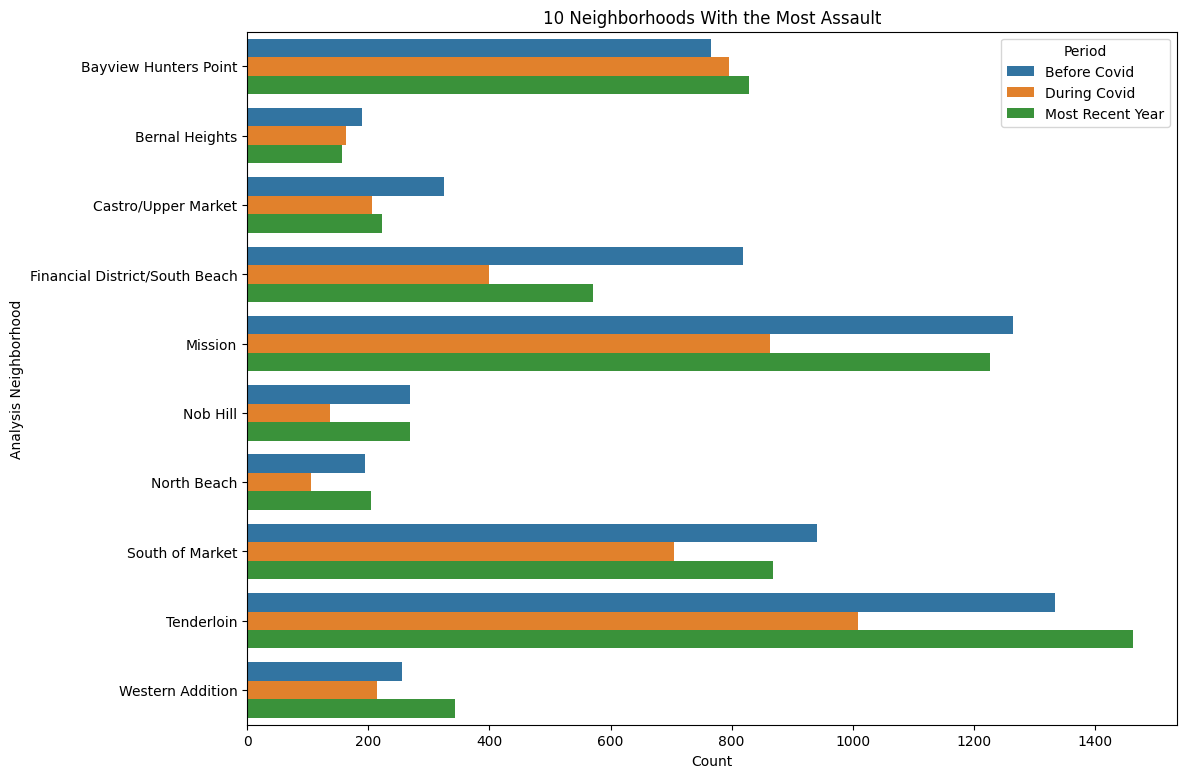

In [21]:
plt.figure(figsize = (12,9))
df = assault[assault['Analysis Neighborhood'].isin(top_ten_assault['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            data=df).set(title = '10 Neighborhoods With the Most Assault')
plt.show()

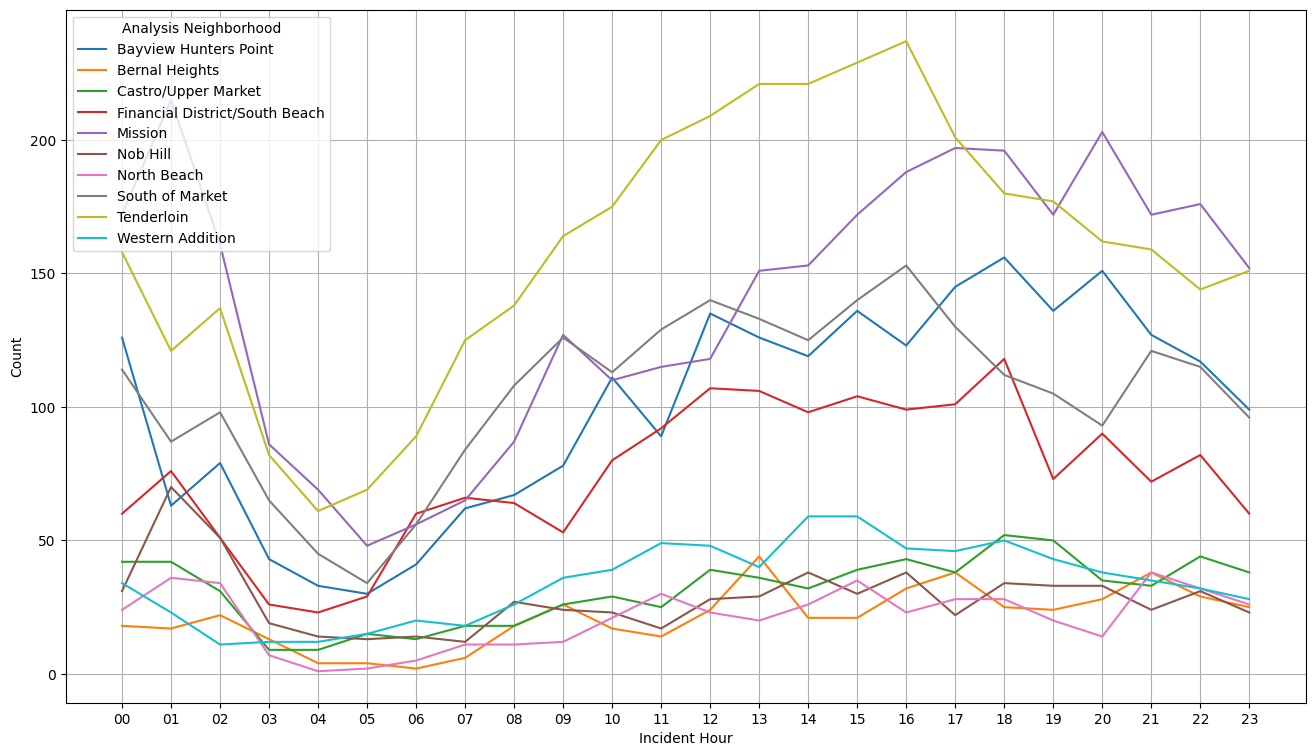

In [22]:
plt.figure(figsize = (16,9))
df = assault[assault['Analysis Neighborhood'].isin(top_ten_assault['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.grid()
plt.show()

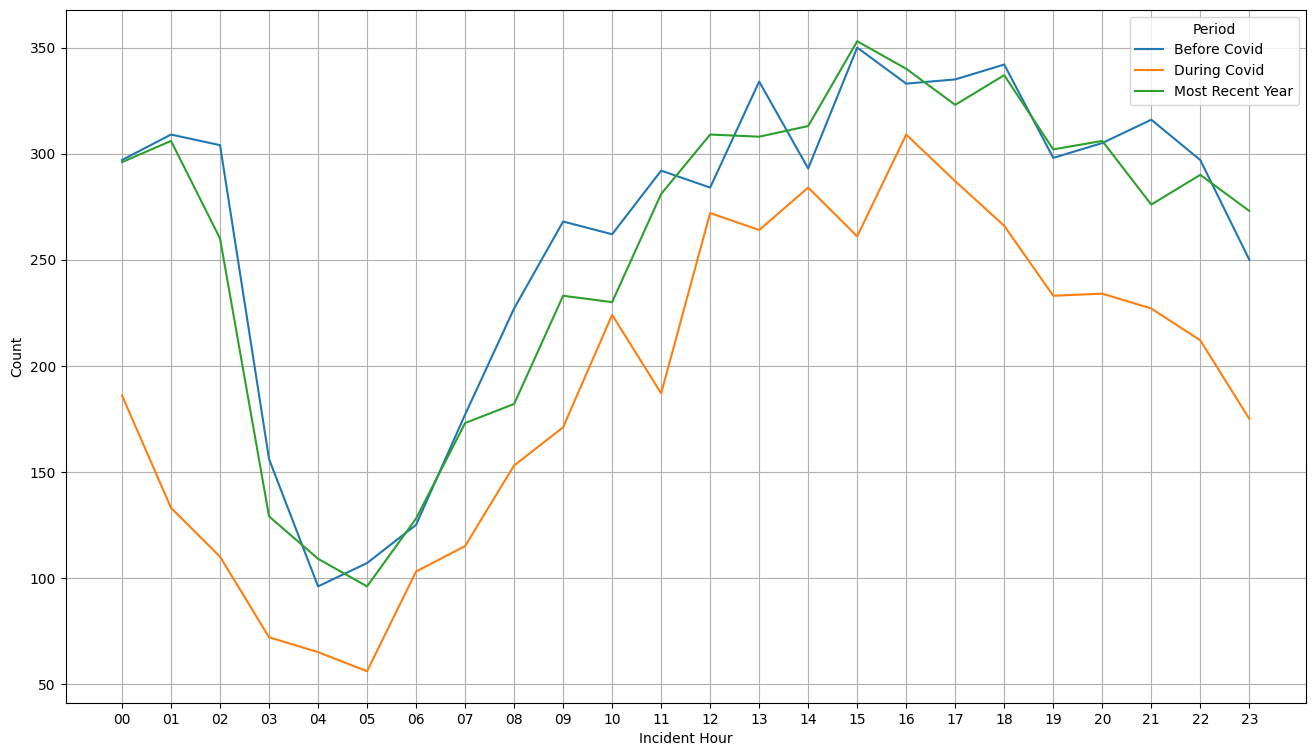

In [23]:
plt.figure(figsize = (16,9))
df = assault[assault['Analysis Neighborhood'].isin(top_ten_assault['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period', hue_order = ['Before Covid', 'During Covid','Most Recent Year'])
plt.grid()
plt.show()

## Auto Parts Theft

In [24]:
auto_parts_theft = sfpd.loc[sfpd['Incident Subcategory'] == 'Larceny - Auto Parts']
auto_parts_theft = auto_parts_theft.loc[(sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [25]:
auto_parts_theft_before = auto_parts_theft.loc[(auto_parts_theft['Incident Date'].between(beforefore,covid_starts))]
auto_parts_theft_now = auto_parts_theft.loc[(auto_parts_theft['Incident Date'].between(year_ago,today))]
auto_parts_theft_change = pd.DataFrame()

auto_parts_theft_change['Year Before Covid'] = auto_parts_theft_before['Analysis Neighborhood'].value_counts()
auto_parts_theft_change['Last Year'] = auto_parts_theft_now['Analysis Neighborhood'].value_counts()

auto_parts_theft_change.loc['Total'] = auto_parts_theft_change.sum()

auto_parts_theft_change['% Change'] = ((auto_parts_theft_change['Last Year'] - auto_parts_theft_change['Year Before Covid'])/
                             auto_parts_theft_change['Year Before Covid'])*100
auto_parts_theft_change['Portion of City Before (%)'] = (auto_parts_theft_before['Analysis Neighborhood'].value_counts()
                               /auto_parts_theft_before['Analysis Neighborhood'].value_counts().sum())*100
auto_parts_theft_change['Portion of City in the Last Year (%)'] = (auto_parts_theft_now['Analysis Neighborhood'].value_counts()
                               /auto_parts_theft_now['Analysis Neighborhood'].value_counts().sum())*100
auto_parts_theft_change

Year Before Covid  Last Year  % Change  \
Sunset/Parkside                              27.0      155.0    474.07   
Bayview Hunters Point                        23.0       92.0    300.00   
West of Twin Peaks                           15.0       70.0    366.67   
Mission                                      14.0       67.0    378.57   
Potrero Hill                                 13.0       28.0    115.38   
Oceanview/Merced/Ingleside                   13.0       55.0    323.08   
Bernal Heights                               12.0       40.0    233.33   
Portola                                      10.0       44.0    340.00   
Lakeshore                                    10.0       20.0    100.00   
Lone Mountain/USF                             9.0       21.0    133.33   
Hayes Valley                                  8.0       15.0     87.50   
Castro/Upper Market                           8.0       29.0    262.50   
Outer Richmond                                8.0       64.0    700.00   
Haight Ashbury                                8.0       25.0    212.50   
Western Addition                              8.0       32.0    300.00   
Russian Hill                                  7.0       15.0    114.29   
Inner Richmond                                7.0       30.0    328.57   
Excelsior                                     7.0       71.0    914.29   
South of Market                               6.0       18.0    200.00   
Golden Gate Park                              6.0        9.0     50.00   
Glen Park                                     6.0       18.0    200.00   
Inner Sunset                                  5.0       39.0    680.00   
Financial District/South Beach                5.0        9.0     80.00   
Pacific Heights                               5.0       14.0    180.00   
Marina                                        5.0        6.0     20.00   
Outer Mission                                 4.0       30.0    650.00   
Chinatown                                     3.0        5.0     66.67   
Noe Valley                                    3.0       40.0   1233.33   
Seacliff                                      3.0        5.0     66.67   
Tenderloin                                    2.0        8.0    300.00   
Presidio Heights                              2.0        5.0    150.00   
Twin Peaks                                    2.0       12.0    500.00   
Treasure Island                               2.0        NaN       NaN   
McLaren Park                                  1.0        4.0    300.00   
North Beach                                   1.0        8.0    700.00   
Total                                       268.0     1103.0    311.57   

                                Portion of City Before (%)  \
Sunset/Parkside                                      10.07   
Bayview Hunters Point                                 8.58   
West of Twin Peaks                                    5.60   
Mission                                               5.22   
Potrero Hill                                          4.85   
Oceanview/Merced/Ingleside                            4.85   
Bernal Heights                                        4.48   
Portola                                               3.73   
Lakeshore                                             3.73   
Lone Mountain/USF                                     3.36   
Hayes Valley                                          2.99   
Castro/Upper Market                                   2.99   
Outer Richmond                                        2.99   
Haight Ashbury                                        2.99   
Western Addition                                      2.99   
Russian Hill                                          2.61   
Inner Richmond                                        2.61   
Excelsior                                             2.61   
South of Market                                       2.24   
Golden Gate Park                                     

In [26]:
# ten neighborhoods with auto parts stolen
top_ten_apt = (auto_parts_theft.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_apt = top_ten_apt.iloc[0:10,:]

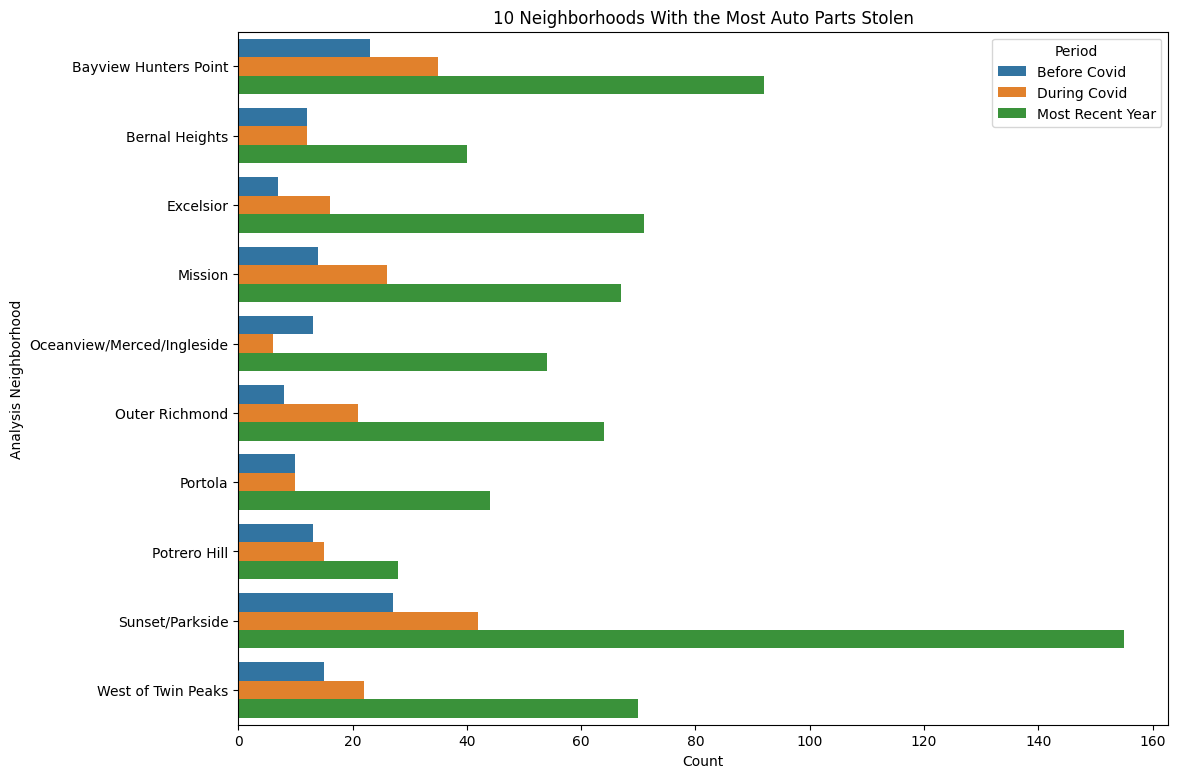

In [27]:
plt.figure(figsize = (12,9))
df = auto_parts_theft[auto_parts_theft['Analysis Neighborhood'].isin(top_ten_apt['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            data=df).set(title = '10 Neighborhoods With the Most Auto Parts Stolen')
plt.show()

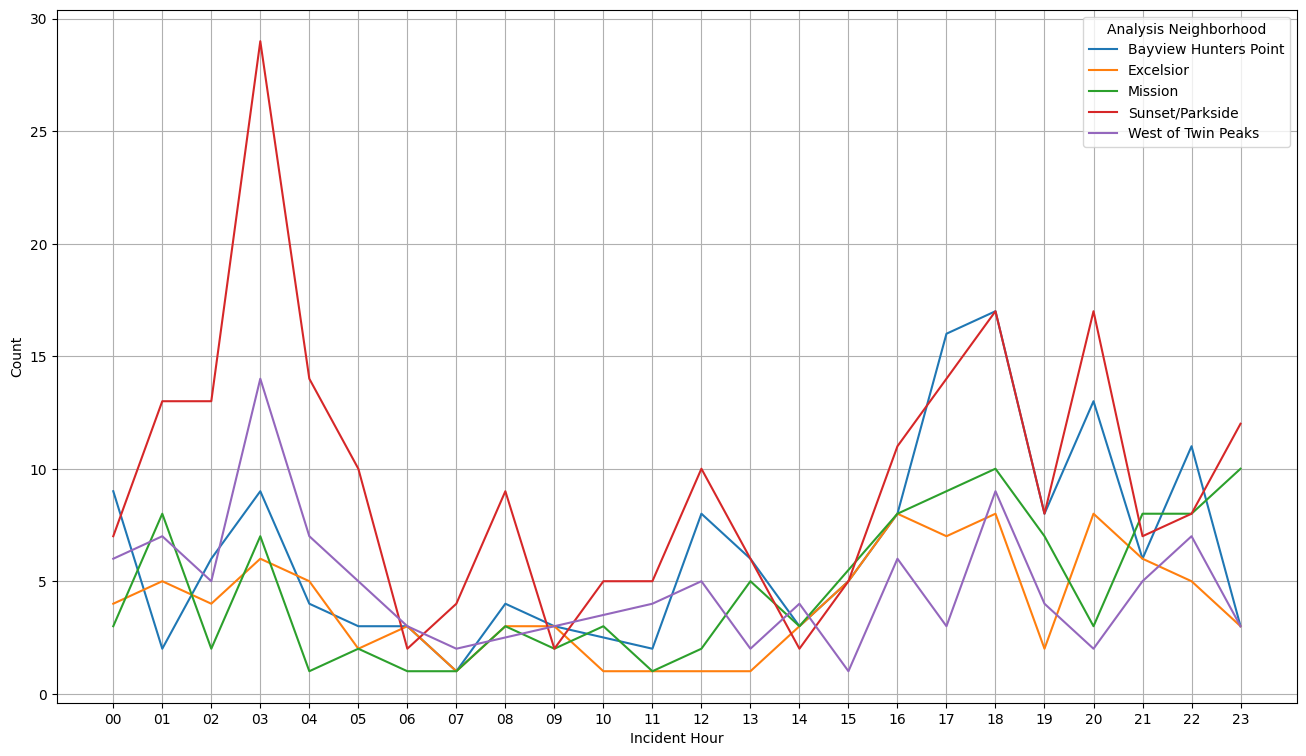

In [28]:
plt.figure(figsize = (16,9))
df = auto_parts_theft[auto_parts_theft['Analysis Neighborhood'].isin(top_ten_apt['Analysis Neighborhood'][0:5])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.grid()
plt.show()

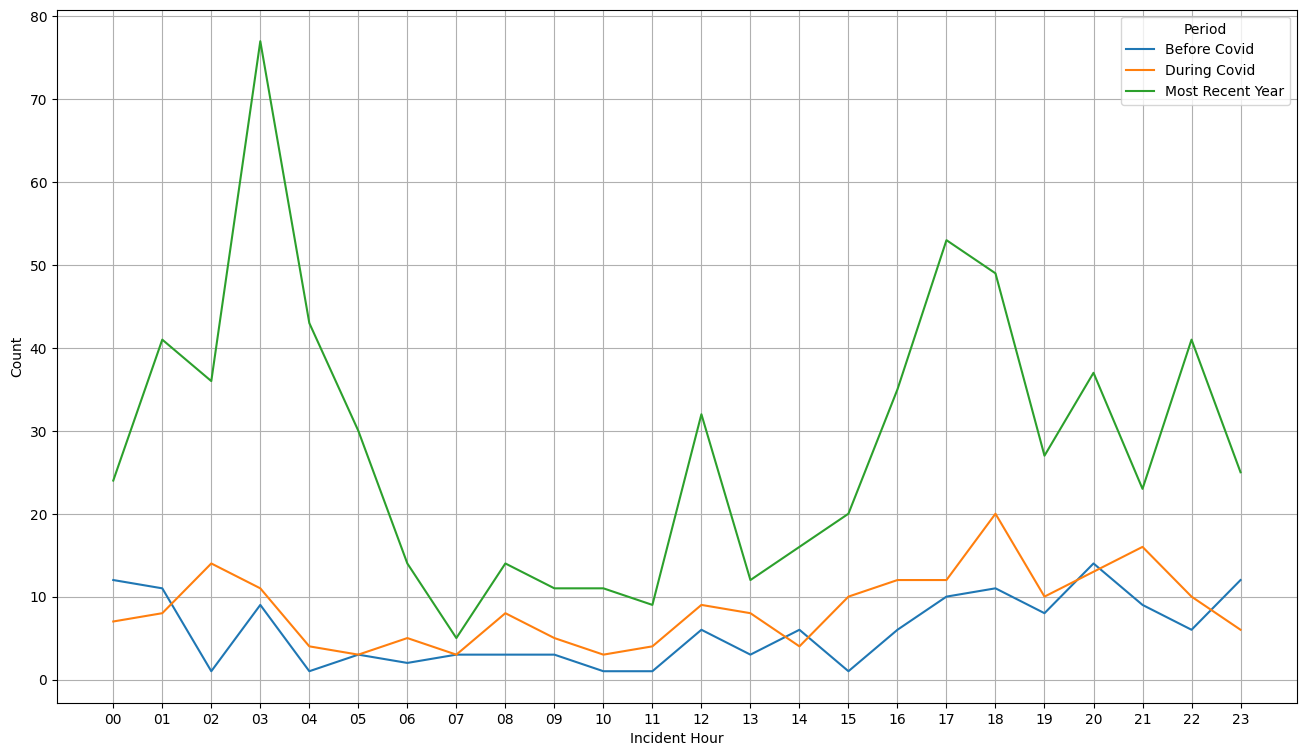

In [29]:
plt.figure(figsize = (16,9))
df = auto_parts_theft[auto_parts_theft['Analysis Neighborhood'].isin(top_ten_apt['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period', hue_order = ['Before Covid', 'During Covid','Most Recent Year'])
# plt.xticks(rotation = 45, ha="right", rotation_mode="anchor")
plt.grid()
plt.show()

## Bicycle Thefts

In [30]:
bike_theft = sfpd.loc[sfpd['Incident Subcategory'] == 'Larceny Theft - Bicycle']
bike_theft = bike_theft.loc[(bike_theft['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [31]:
bike_theft_before = bike_theft.loc[(bike_theft['Incident Date'].between(beforefore,covid_starts))]
bike_theft_now = bike_theft.loc[(bike_theft['Incident Date'].between(year_ago,today))]
bike_theft_change = pd.DataFrame()

bike_theft_change['Year Before Covid'] = bike_theft_before['Analysis Neighborhood'].value_counts()
bike_theft_change['Last Year'] = bike_theft_now['Analysis Neighborhood'].value_counts()

bike_theft_change.loc['Total'] = bike_theft_change.sum()

bike_theft_change['% Change'] = ((bike_theft_change['Last Year'] - bike_theft_change['Year Before Covid'])/
                             bike_theft_change['Year Before Covid'])*100
bike_theft_change['Portion of City Before (%)'] = (bike_theft_before['Analysis Neighborhood'].value_counts()
                               /bike_theft_before['Analysis Neighborhood'].value_counts().sum())*100
bike_theft_change['Portion of City in the Last Year (%)'] = (bike_theft_now['Analysis Neighborhood'].value_counts()
                               /bike_theft_now['Analysis Neighborhood'].value_counts().sum())*100
bike_theft_change

Year Before Covid  Last Year  % Change  \
Financial District/South Beach              126.0       81.0    -35.71   
South of Market                              76.0       40.0    -47.37   
Mission                                      74.0       60.0    -18.92   
Mission Bay                                  42.0       18.0    -57.14   
Tenderloin                                   38.0       35.0     -7.89   
No Neighborhood Data                         29.0        6.0    -79.31   
North Beach                                  22.0       11.0    -50.00   
Hayes Valley                                 14.0        9.0    -35.71   
Russian Hill                                 13.0        6.0    -53.85   
Castro/Upper Market                          13.0        3.0    -76.92   
Chinatown                                     9.0        7.0    -22.22   
Nob Hill                                      8.0        8.0      0.00   
Noe Valley                                    8.0        3.0    -62.50   
West of Twin Peaks                            7.0        1.0    -85.71   
Bayview Hunters Point                         7.0        3.0    -57.14   
Lone Mountain/USF                             7.0       13.0     85.71   
Presidio Heights                              6.0        3.0    -50.00   
Haight Ashbury                                6.0        1.0    -83.33   
Potrero Hill                                  6.0       10.0     66.67   
Marina                                        6.0        9.0     50.00   
Treasure Island                               5.0        1.0    -80.00   
Bernal Heights                                5.0        6.0     20.00   
Japantown                                     5.0        5.0      0.00   
Outer Richmond                                4.0        8.0    100.00   
Lakeshore                                     3.0        6.0    100.00   
Sunset/Parkside                               3.0        9.0    200.00   
Visitacion Valley                             3.0        NaN       NaN   
Presidio                                      2.0        NaN       NaN   
Pacific Heights                               2.0        6.0    200.00   
Golden Gate Park                              2.0        3.0     50.00   
Western Addition                              2.0        9.0    350.00   
Inner Richmond                                2.0        3.0     50.00   
Inner Sunset                                  2.0        2.0      0.00   
Portola                                       1.0        1.0      0.00   
Outer Mission                                 1.0        NaN       NaN   
Glen Park                                     1.0        1.0      0.00   
Oceanview/Merced/Ingleside                    1.0        NaN       NaN   
Total                                       561.0      387.0    -31.02   

                                Portion of City Before (%)  \
Financial District/South Beach                       22.46   
South of Market                                      13.55   
Mission                                              13.19   
Mission Bay                                           7.49   
Tenderloin                                            6.77   
No Neighborhood Data                                  5.17   
North Beach                                           3.92   
Hayes Valley                                          2.50   
Russian Hill                                          2.32   
Castro/Upper Market                                   2.32   
Chinatown                                             1.60   
Nob Hill                                              1.43   
Noe Valley                                            1.43   
West of Twin Peaks                                    1.25   
Bayview Hunters Point                                 1.25   
Lone Mountain/USF                                     1.25   
Presidio Heights                                      1.07   
Haight Ashbury               

In [32]:
top_ten_bt = (bike_theft.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_bt = top_ten_bt.loc[top_ten_bt['Analysis Neighborhood'] != 'No Neighborhood Data']
top_ten_bt = top_ten_bt.iloc[0:10,:]

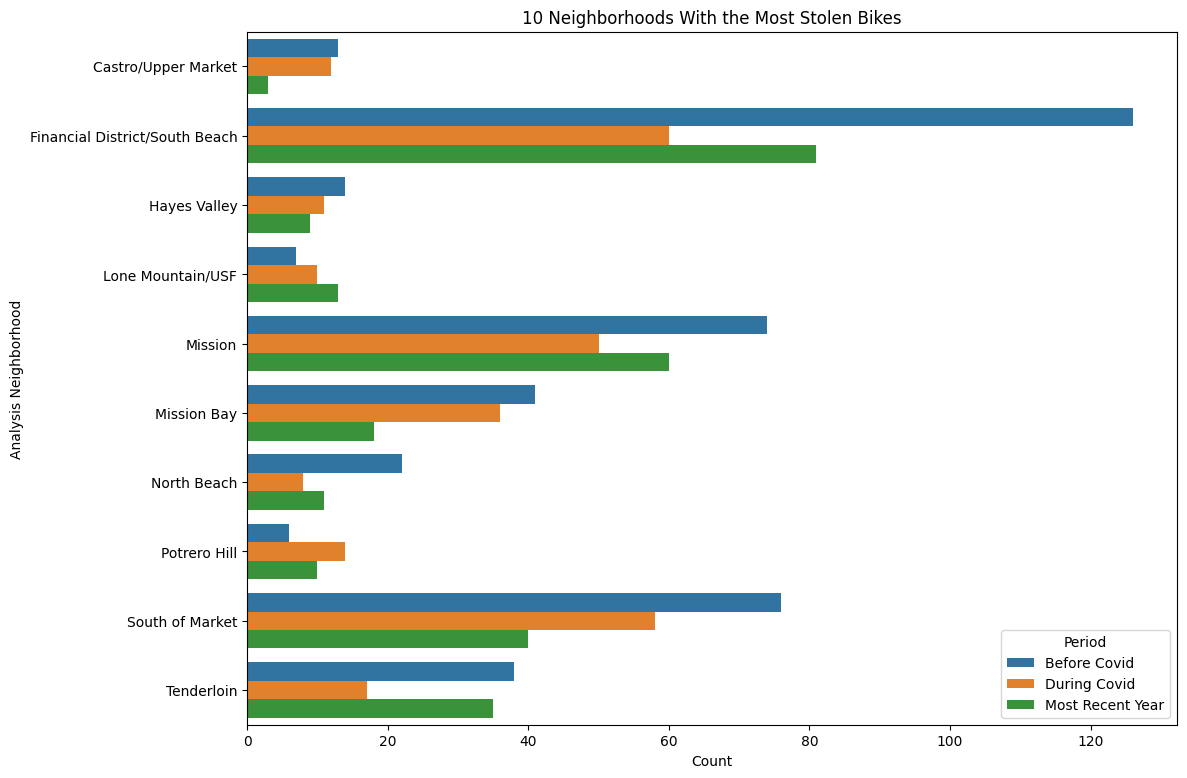

In [33]:
plt.figure(figsize = (12,9))
df = bike_theft[bike_theft['Analysis Neighborhood'].isin(top_ten_bt['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            data=df).set(title = '10 Neighborhoods With the Most Stolen Bikes')
plt.show()

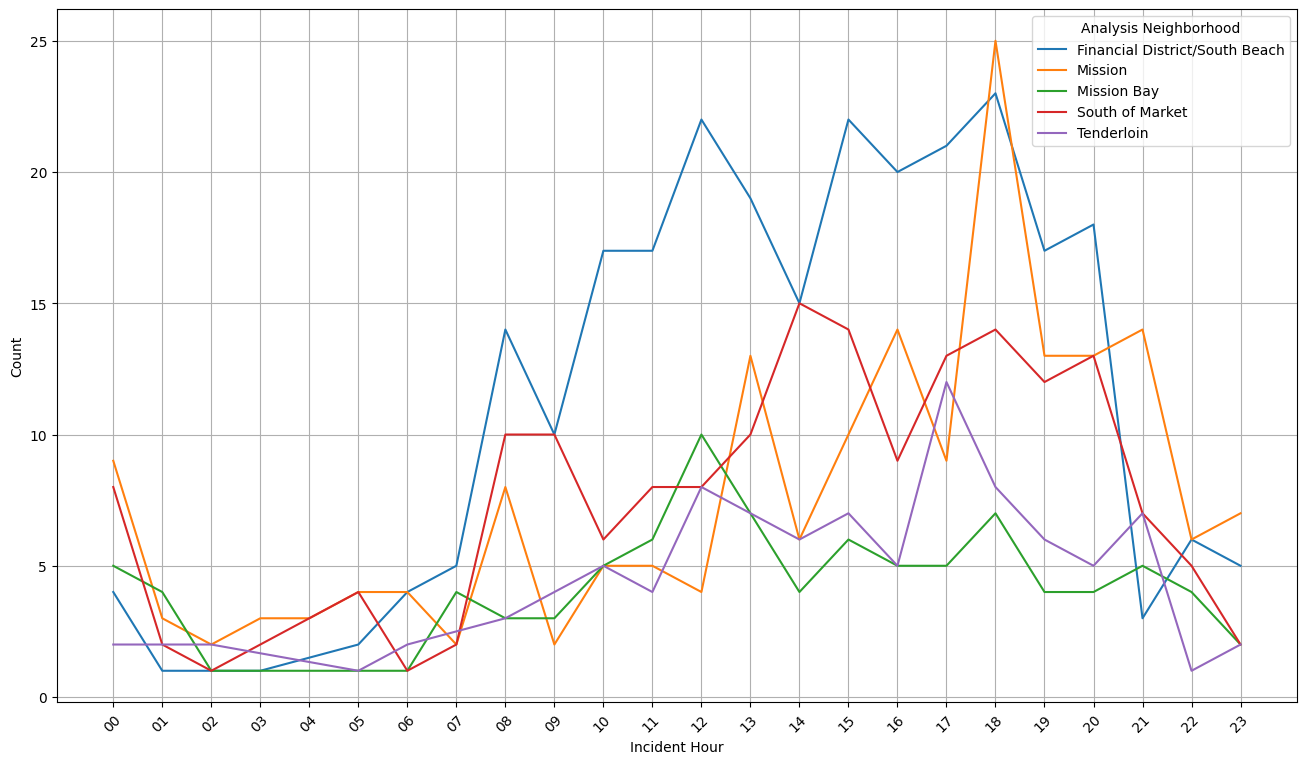

In [34]:
plt.figure(figsize = (16,9))
df = bike_theft[bike_theft['Analysis Neighborhood'].isin(top_ten_bt['Analysis Neighborhood'][0:5])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.xticks(rotation = 45, ha="right", rotation_mode="anchor")
plt.grid()
plt.show()

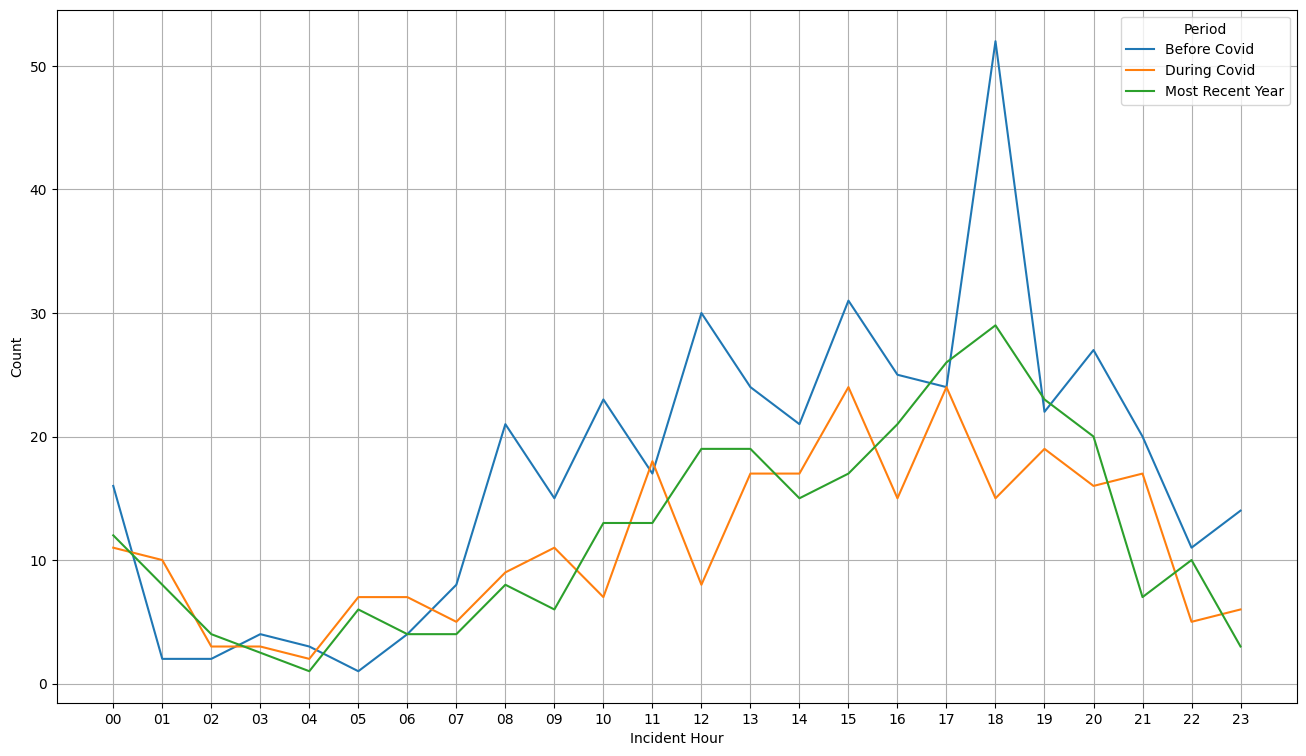

In [35]:
plt.figure(figsize = (16,9))
df = bike_theft[bike_theft['Analysis Neighborhood'].isin(top_ten_bt['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period', hue_order = ['Before Covid', 'During Covid','Most Recent Year'])
# plt.xticks(rotation = 45, ha="right", rotation_mode="anchor")
plt.grid()
plt.show()

## Car Break-ins

In [36]:
carceny_before = carceny_sfpd.loc[(carceny_sfpd['Incident Date'].between(beforefore,covid_starts))]
carceny_now = carceny_sfpd.loc[(carceny_sfpd['Incident Date'].between(year_ago,today))]
carceny_change = pd.DataFrame()

carceny_change['Year Before Covid'] = carceny_before['Analysis Neighborhood'].value_counts()
carceny_change['Last Year'] = carceny_now['Analysis Neighborhood'].value_counts()

carceny_change.loc['Total'] = carceny_change.sum()

carceny_change['% Change'] = ((carceny_change['Last Year'] - carceny_change['Year Before Covid'])/
                             carceny_change['Year Before Covid'])*100
carceny_change['Portion of City Before (%)'] = (carceny_before['Analysis Neighborhood'].value_counts()
                               /carceny_before['Analysis Neighborhood'].value_counts().sum())*100
carceny_change['Portion of City in the Last Year (%)'] = (carceny_now['Analysis Neighborhood'].value_counts()
                               /carceny_now['Analysis Neighborhood'].value_counts().sum())*100
carceny_change

Year Before Covid  Last Year  % Change  \
No Neighborhood Data                         3112       2775    -10.83   
Financial District/South Beach               1984       1744    -12.10   
Mission                                      1922       1148    -40.27   
Hayes Valley                                 1569       1127    -28.17   
North Beach                                  1515       2617     72.74   
South of Market                              1341        908    -32.29   
Western Addition                             1257        741    -41.05   
Marina                                       1249        927    -25.78   
Outer Richmond                               1183        776    -34.40   
Russian Hill                                 1128       1501     33.07   
Tenderloin                                   1023        493    -51.81   
Japantown                                     822        786     -4.38   
Nob Hill                                      759        536    -29.38   
Bayview Hunters Point                         736        548    -25.54   
Pacific Heights                               719        438    -39.08   
Sunset/Parkside                               662        604     -8.76   
Castro/Upper Market                           619        421    -31.99   
West of Twin Peaks                            569        336    -40.95   
Potrero Hill                                  556        252    -54.68   
Golden Gate Park                              531        557      4.90   
Inner Richmond                                456        394    -13.60   
Chinatown                                     446        354    -20.63   
Inner Sunset                                  442        470      6.33   
Lakeshore                                     439        361    -17.77   
Haight Ashbury                                435        501     15.17   
Twin Peaks                                    428        198    -53.74   
Bernal Heights                                348        265    -23.85   
Lone Mountain/USF                             327        167    -48.93   
Mission Bay                                   273        167    -38.83   
Noe Valley                                    217        212     -2.30   
Presidio                                      213         90    -57.75   
Portola                                       213        126    -40.85   
Outer Mission                                 186        150    -19.35   
Excelsior                                     178        190      6.74   
Glen Park                                     171         97    -43.27   
Lincoln Park                                  171        148    -13.45   
Presidio Heights                              168         97    -42.26   
Oceanview/Merced/Ingleside                    121        155     28.10   
Visitacion Valley                             103         82    -20.39   
Treasure Island                                60         27    -55.00   
Seacliff                                       29         61    110.34   
McLaren Park                                   24         27     12.50   
Total                                       28704      23574    -17.87   

                                Portion of City Before (%)  \
No Neighborhood Data                                 10.84   
Financial District/South Beach                        6.91   
Mission                                               6.70   
Hayes Valley                                          5.47   
North Beach                                           5.28   
South of Market                                       4.67   
Western Addition                                      4.38   
Marina                                                4.35   
Outer Richmond                                        4.12   
Russian Hill                                          3.93   
Tenderloin                                            3.56   
Japantown                      

Non-violent crimes tend to be filed online which leads to people omitting some information. The neighborhood in which the crime occured is frequently omitted which is why "No Neighborhood Data" has the most occurences of car break-ins.

In [37]:
top_ten_carceny = carceny_sfpd.loc[(carceny_sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (carceny_sfpd['Incident Date'].between(year_ago,today)))]
top_ten_carceny = (top_ten_carceny.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_carceny = top_ten_carceny.loc[top_ten_carceny['Analysis Neighborhood'] != 'No Neighborhood Data']
top_ten_carceny = top_ten_carceny.iloc[0:10,:]

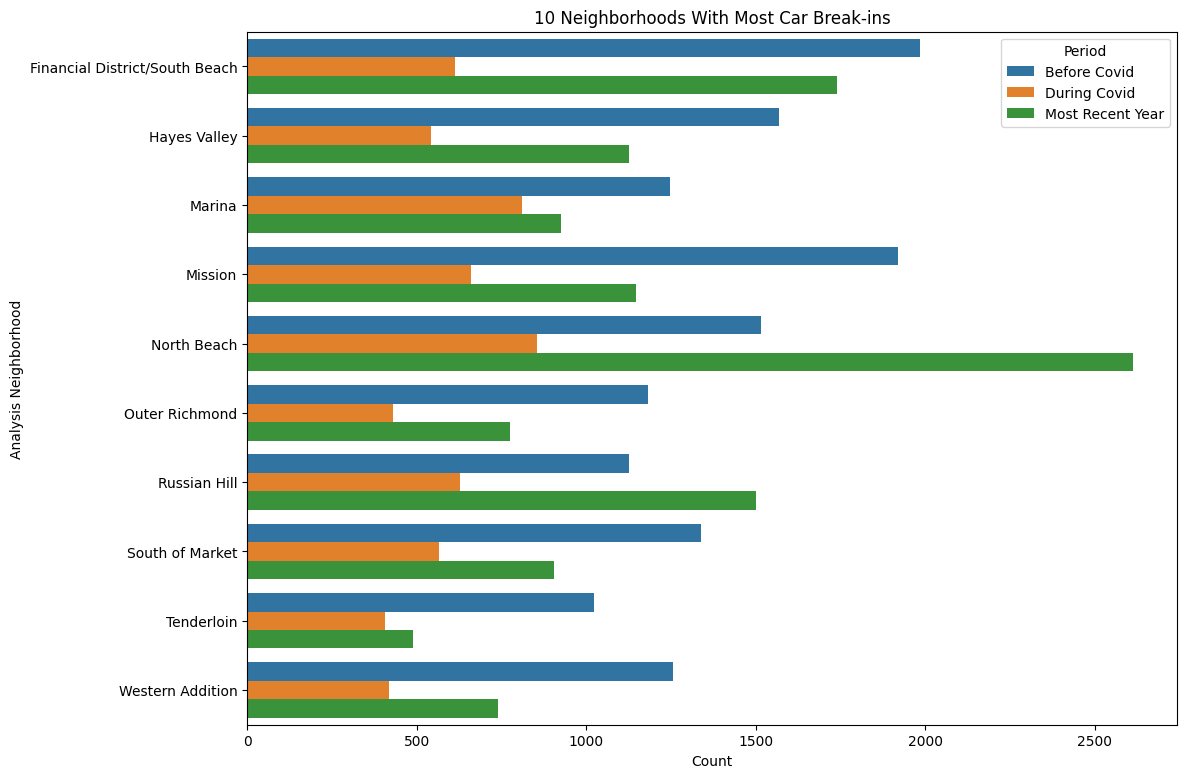

In [38]:
plt.figure(figsize = (12,9))
df = carceny_sfpd[carceny_sfpd['Analysis Neighborhood'].isin(top_ten_carceny['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            errorbar=None,
            data=df).set(title = '10 Neighborhoods With Most Car Break-ins')
plt.show()

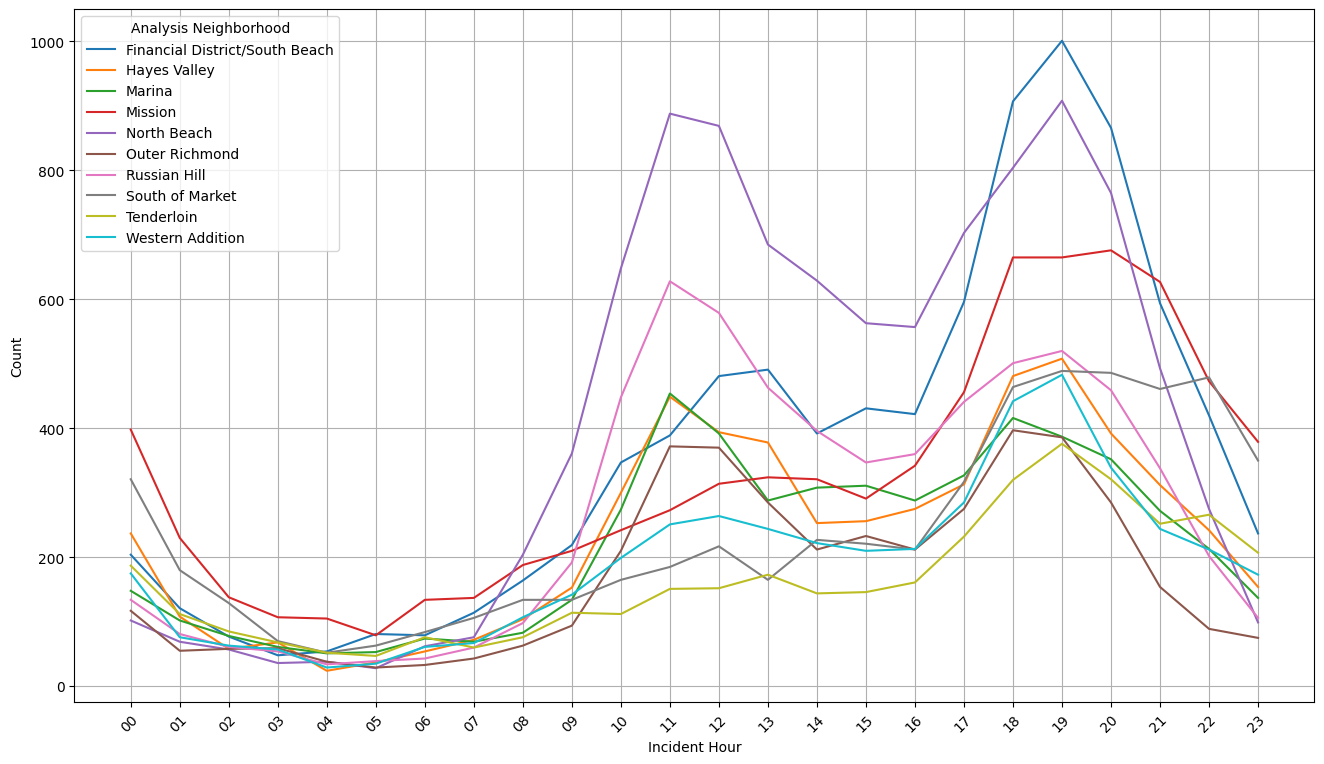

In [39]:
plt.figure(figsize = (16,9))
df = carceny_sfpd[carceny_sfpd['Analysis Neighborhood'].isin(top_ten_carceny['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.xticks(rotation = 45, ha="right", rotation_mode="anchor")
plt.grid()
plt.show()

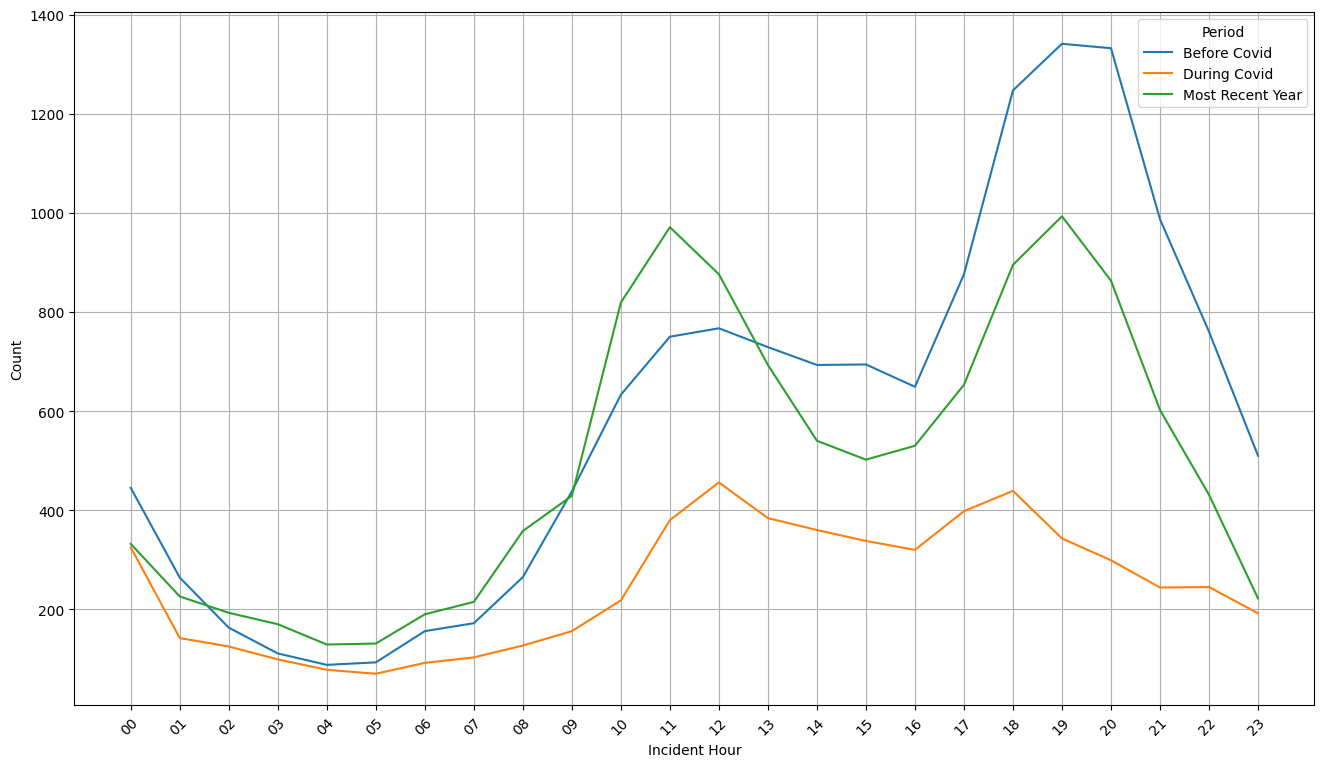

In [40]:
plt.figure(figsize = (16,9))
df = carceny_sfpd[carceny_sfpd['Analysis Neighborhood'].isin(top_ten_carceny['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period')
plt.xticks(rotation = 45, ha="right", rotation_mode="anchor")
plt.grid()
plt.show()

#### Car Break-in Arrests

In [41]:
carceny_arrests = arrests.loc[((arrests['Incident Subcategory'] == 'Larceny - From Vehicle') |
                              (sfpd['Incident Description'] == 'Burglary, Vehicle (Arrest made)') |
                              (sfpd['Incident Description'] == 'Burglary, Vehicle, Att. (Arrest made)'))]
carceny_arrests = carceny_arrests.drop_duplicates(subset='Incident Number')

In [42]:
# percent of carceny leading to arrest
(len(carceny_arrests)/len(carceny_sfpd.drop_duplicates(subset='Incident Number')))*100

1.5324418378703033

In [43]:
carceny_arrests_before = carceny_arrests.loc[carceny_arrests['Incident Datetime'].between(beforefore,covid_starts)]
carceny_arrests_now = carceny_arrests.loc[carceny_arrests['Incident Datetime'].between(year_ago,today)]

In [44]:
carceny_before = carceny_sfpd.loc[carceny_sfpd['Incident Datetime']
                                  .between(beforefore,covid_starts)].drop_duplicates(subset='Incident Number')
carceny_now = carceny_sfpd.loc[carceny_sfpd['Incident Datetime']
                                  .between(year_ago,today)].drop_duplicates(subset='Incident Number')

In [45]:
(len(carceny_arrests_before)/len(carceny_before))*100

1.742802303262956

In [46]:
(len(carceny_arrests_now)/len(carceny_now))*100

1.0089841050449206

In the year leading up to the pandemic, car break-ins lead to an arrest rate of 1.74%. In the last year it has decreased to 1.01%.

## Mental Health Detention

In [47]:
mental_health_detention = sfpd.loc[sfpd['Incident Description'] == 'Mental Health Detention']
mental_health_detention = mental_health_detention.loc[(sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [48]:
mental_health_detention_before = mental_health_detention.loc[(mental_health_detention['Incident Date'].between(beforefore,covid_starts))]
mental_health_detention_now = mental_health_detention.loc[(mental_health_detention['Incident Date'].between(year_ago,today))]
mental_health_detention_change = pd.DataFrame()

mental_health_detention_change['Year Before Covid'] = mental_health_detention_before['Analysis Neighborhood'].value_counts()
mental_health_detention_change['Last Year'] = mental_health_detention_now['Analysis Neighborhood'].value_counts()

mental_health_detention_change.loc['Total'] = mental_health_detention_change.sum()

mental_health_detention_change['% Change'] = ((mental_health_detention_change['Last Year'] - mental_health_detention_change['Year Before Covid'])/
                             mental_health_detention_change['Year Before Covid'])*100
mental_health_detention_change['Portion of City Before (%)'] = (mental_health_detention_before['Analysis Neighborhood'].value_counts()
                               /mental_health_detention_before['Analysis Neighborhood'].value_counts().sum())*100
mental_health_detention_change['Portion of City in the Last Year (%)'] = (mental_health_detention_now['Analysis Neighborhood'].value_counts()
                               /mental_health_detention_now['Analysis Neighborhood'].value_counts().sum())*100
mental_health_detention_change

Year Before Covid  Last Year  % Change  \
Tenderloin                                  461.0      321.0    -30.37   
South of Market                             460.0      277.0    -39.78   
Mission                                     424.0      198.0    -53.30   
Financial District/South Beach              254.0      189.0    -25.59   
Sunset/Parkside                             146.0       88.0    -39.73   
Castro/Upper Market                         130.0       55.0    -57.69   
Bayview Hunters Point                       127.0      100.0    -21.26   
Nob Hill                                    116.0      111.0     -4.31   
Western Addition                             92.0       59.0    -35.87   
Hayes Valley                                 86.0       57.0    -33.72   
Outer Richmond                               80.0       56.0    -30.00   
North Beach                                  79.0       69.0    -12.66   
Mission Bay                                  71.0       59.0    -16.90   
Chinatown                                    68.0       83.0     22.06   
West of Twin Peaks                           62.0       48.0    -22.58   
Marina                                       60.0       50.0    -16.67   
Bernal Heights                               58.0       32.0    -44.83   
Haight Ashbury                               54.0       21.0    -61.11   
Excelsior                                    51.0       51.0      0.00   
Russian Hill                                 48.0       28.0    -41.67   
Oceanview/Merced/Ingleside                   46.0       29.0    -36.96   
Lone Mountain/USF                            44.0       24.0    -45.45   
Pacific Heights                              44.0       29.0    -34.09   
Lakeshore                                    41.0       14.0    -65.85   
Outer Mission                                39.0       36.0     -7.69   
Inner Sunset                                 38.0       24.0    -36.84   
Visitacion Valley                            38.0       32.0    -15.79   
Noe Valley                                   34.0       32.0     -5.88   
Inner Richmond                               32.0       30.0     -6.25   
Portola                                      31.0       23.0    -25.81   
Golden Gate Park                             26.0       20.0    -23.08   
Treasure Island                              25.0        6.0    -76.00   
Potrero Hill                                 24.0       23.0     -4.17   
Japantown                                    15.0       19.0     26.67   
Glen Park                                    15.0       29.0     93.33   
Presidio Heights                             15.0       15.0      0.00   
Twin Peaks                                   14.0       10.0    -28.57   
No Neighborhood Data                          8.0        1.0    -87.50   
McLaren Park                                  3.0        NaN       NaN   
Seacliff                                      2.0        2.0      0.00   
Presidio                                      1.0        2.0    100.00   
Total                                      3462.0     2352.0    -32.06   

                                Portion of City Before (%)  \
Tenderloin                                           13.32   
South of Market                                      13.29   
Mission                                              12.25   
Financial District/South Beach                        7.34   
Sunset/Parkside                                       4.22   
Castro/Upper Market                                   3.76   
Bayview Hunters Point                                 3.67   
Nob Hill                                              3.35   
Western Addition                                      2.66   
Hayes Valley                                          2.48   
Outer Richmond                                        2.31   
North Beach                                           2.28   
Mission Bay                                

In [49]:
mental_health_detention_before['Analysis Neighborhood'].value_counts()/mental_health_detention_before['Analysis Neighborhood'].value_counts().sum()

Tenderloin                        1.33e-01
South of Market                   1.33e-01
Mission                           1.22e-01
Financial District/South Beach    7.34e-02
Sunset/Parkside                   4.22e-02
Castro/Upper Market               3.76e-02
Bayview Hunters Point             3.67e-02
Nob Hill                          3.35e-02
Western Addition                  2.66e-02
Hayes Valley                      2.48e-02
Outer Richmond                    2.31e-02
North Beach                       2.28e-02
Mission Bay                       2.05e-02
Chinatown                         1.96e-02
West of Twin Peaks                1.79e-02
Marina                            1.73e-02
Bernal Heights                    1.68e-02
Haight Ashbury                    1.56e-02
Excelsior                         1.47e-02
Russian Hill                      1.39e-02
Oceanview/Merced/Ingleside        1.33e-02
Lone Mountain/USF                 1.27e-02
Pacific Heights                   1.27e-02
Lakeshore  

In [50]:
# ten neighborhoods with mental health detention
top_ten_mhd = (mental_health_detention.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_mhd = top_ten_mhd.iloc[0:10,:]

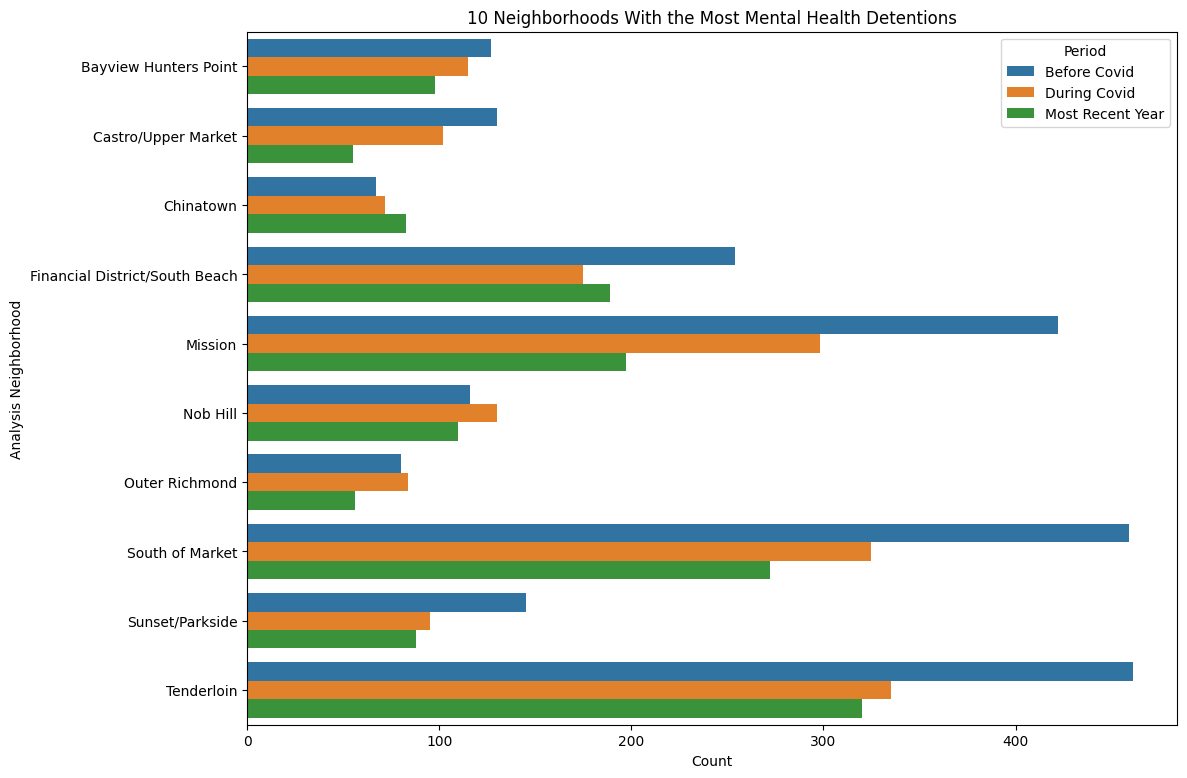

In [51]:
plt.figure(figsize = (12,9))
df = mental_health_detention[mental_health_detention['Analysis Neighborhood'].isin(top_ten_mhd['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            data=df).set(title = '10 Neighborhoods With the Most Mental Health Detentions')
plt.show()

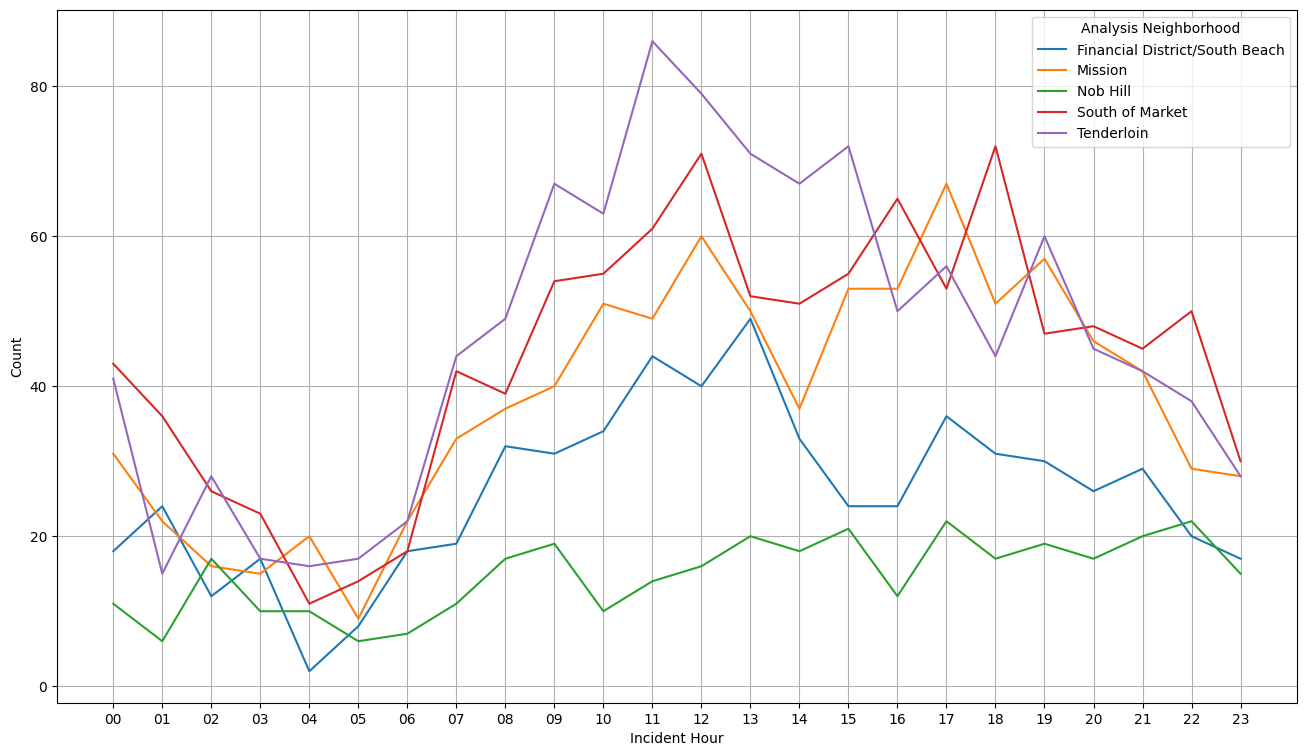

In [52]:
plt.figure(figsize = (16,9))
df = mental_health_detention[mental_health_detention['Analysis Neighborhood'].isin(top_ten_mhd['Analysis Neighborhood'][0:5])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.grid()
plt.show()

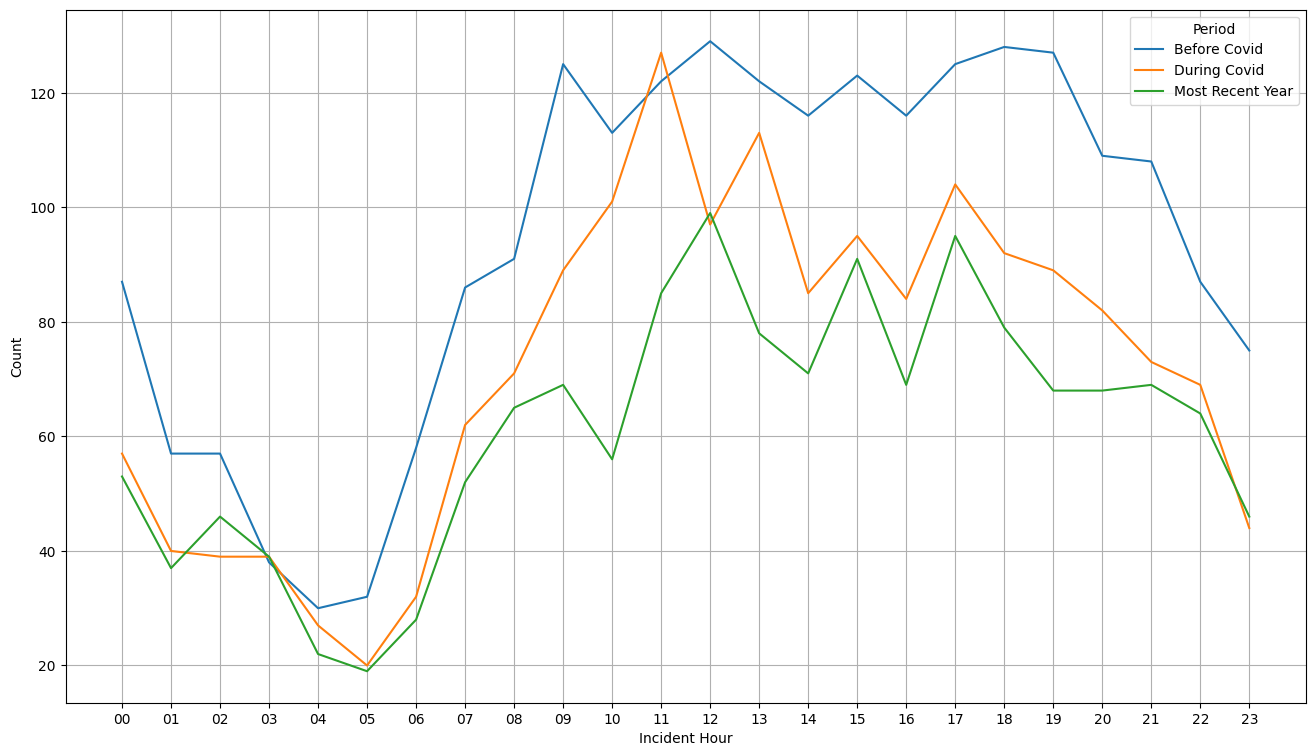

In [53]:
plt.figure(figsize = (16,9))
df = mental_health_detention[mental_health_detention['Analysis Neighborhood'].isin(top_ten_mhd['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period', hue_order = ['Before Covid', 'During Covid','Most Recent Year'])
plt.grid()
plt.show()

## Motor Vehicle Theft

In [54]:
motor_theft = sfpd.loc[sfpd['Incident Category'] == 'Motor Vehicle Theft']
motor_theft = motor_theft.loc[(sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [55]:
motor_theft_before = motor_theft.loc[(motor_theft['Incident Date'].between(beforefore,covid_starts))]
motor_theft_now = motor_theft.loc[(motor_theft['Incident Date'].between(year_ago,today))]
motor_theft_change = pd.DataFrame()

motor_theft_change['Year Before Covid'] = motor_theft_before['Analysis Neighborhood'].value_counts()
motor_theft_change['Last Year'] = motor_theft_now['Analysis Neighborhood'].value_counts()

motor_theft_change.loc['Total'] = motor_theft_change.sum()

motor_theft_change['% Change'] = ((motor_theft_change['Last Year'] - motor_theft_change['Year Before Covid'])/
                             motor_theft_change['Year Before Covid'])*100
motor_theft_change['Portion of City Before (%)'] = (motor_theft_before['Analysis Neighborhood'].value_counts()
                               /motor_theft_before['Analysis Neighborhood'].value_counts().sum())*100
motor_theft_change['Portion of City in the Last Year (%)'] = (motor_theft_now['Analysis Neighborhood'].value_counts()
                               /motor_theft_now['Analysis Neighborhood'].value_counts().sum())*100
motor_theft_change

Year Before Covid  Last Year  % Change  \
Bayview Hunters Point                         592       1066     80.07   
Mission                                       571        943     65.15   
South of Market                               343        492     43.44   
Tenderloin                                    284        413     45.42   
Financial District/South Beach                254        270      6.30   
Sunset/Parkside                               234        324     38.46   
Western Addition                              202        258     27.72   
Nob Hill                                      190        185     -2.63   
West of Twin Peaks                            185        255     37.84   
Outer Richmond                                171        162     -5.26   
Bernal Heights                                167        310     85.63   
Castro/Upper Market                           151        179     18.54   
Hayes Valley                                  146        178     21.92   
Potrero Hill                                  138        248     79.71   
Excelsior                                     134        255     90.30   
Pacific Heights                               118        125      5.93   
Haight Ashbury                                115        146     26.96   
Outer Mission                                 114        181     58.77   
Portola                                       113        223     97.35   
Russian Hill                                  105         98     -6.67   
Noe Valley                                    105        148     40.95   
Marina                                        103        144     39.81   
Inner Richmond                                101         80    -20.79   
Lone Mountain/USF                              98        121     23.47   
North Beach                                    96         82    -14.58   
Oceanview/Merced/Ingleside                     93        180     93.55   
No Neighborhood Data                           92         96      4.35   
Inner Sunset                                   84         87      3.57   
Lakeshore                                      80        143     78.75   
Visitacion Valley                              68        183    169.12   
Mission Bay                                    68         97     42.65   
Chinatown                                      57         41    -28.07   
Glen Park                                      54         82     51.85   
Presidio Heights                               50         63     26.00   
Golden Gate Park                               49         56     14.29   
Japantown                                      42         45      7.14   
Twin Peaks                                     21         49    133.33   
Treasure Island                                17         20     17.65   
McLaren Park                                   15         13    -13.33   
Seacliff                                       12         16     33.33   
Presidio                                        7          1    -85.71   
Lincoln Park                                    3          4     33.33   
Total                                        5642       8062     42.89   

                                Portion of City Before (%)  \
Bayview Hunters Point                                10.49   
Mission                                              10.12   
South of Market                                       6.08   
Tenderloin                                            5.03   
Financial District/South Beach                        4.50   
Sunset/Parkside                                       4.15   
Western Addition                                      3.58   
Nob Hill                                              3.37   
West of Twin Peaks                                    3.28   
Outer Richmond                                        3.03   
Bernal Heights                                        2.96   
Castro/Upper Market            

In [56]:
top_ten_mt = (motor_theft.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_mt = top_ten_mt.iloc[0:10,:]

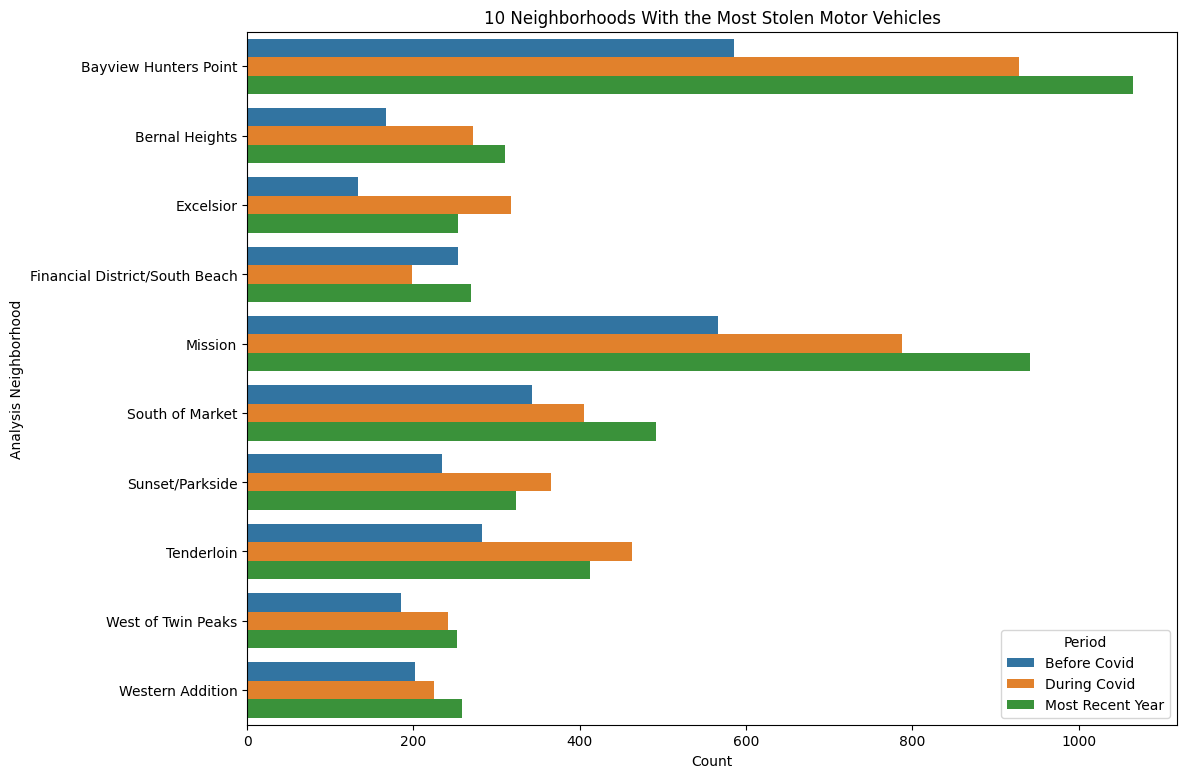

In [57]:
plt.figure(figsize = (12,9))
df = motor_theft[motor_theft['Analysis Neighborhood'].isin(top_ten_mt['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            hue_order = ['Before Covid', 'During Covid','Most Recent Year'],
            data=df).set(title = '10 Neighborhoods With the Most Stolen Motor Vehicles')
plt.show()

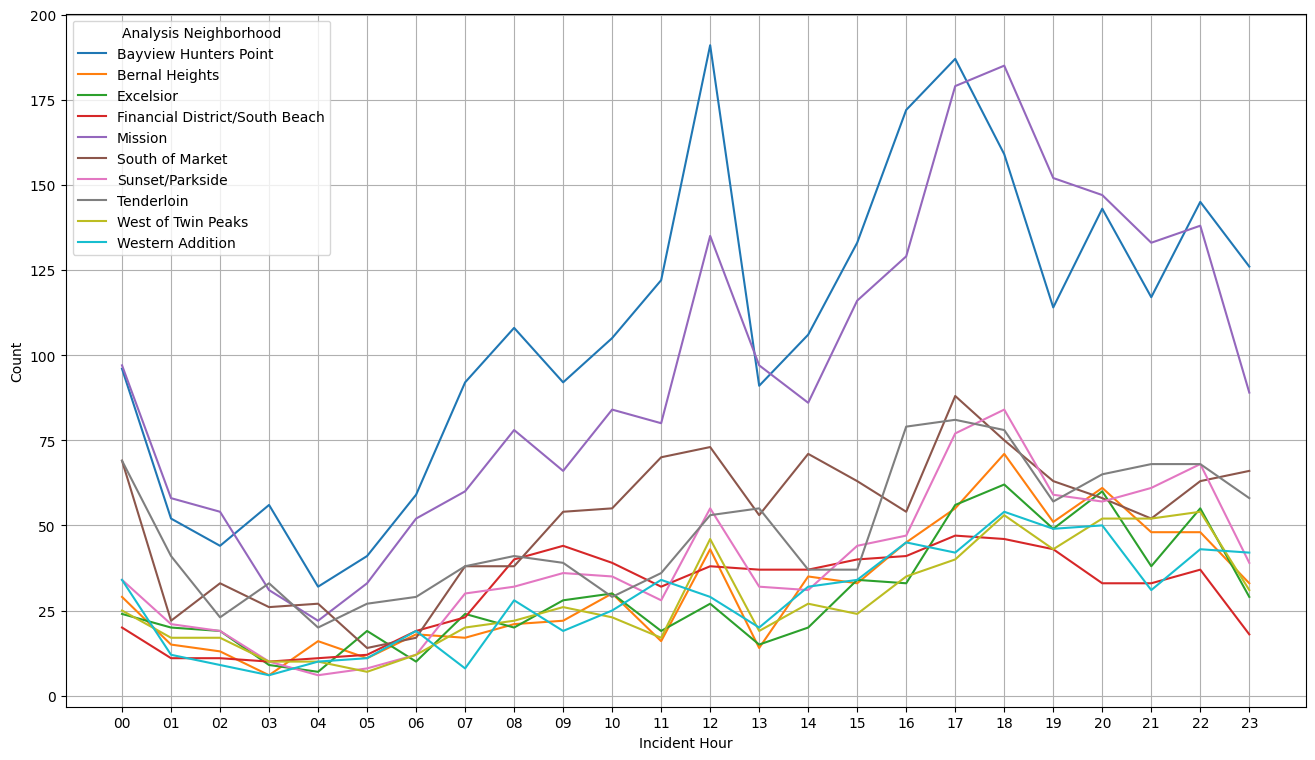

In [58]:
plt.figure(figsize = (16,9))
df = motor_theft[motor_theft['Analysis Neighborhood'].isin(top_ten_mt['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.grid()
plt.show()

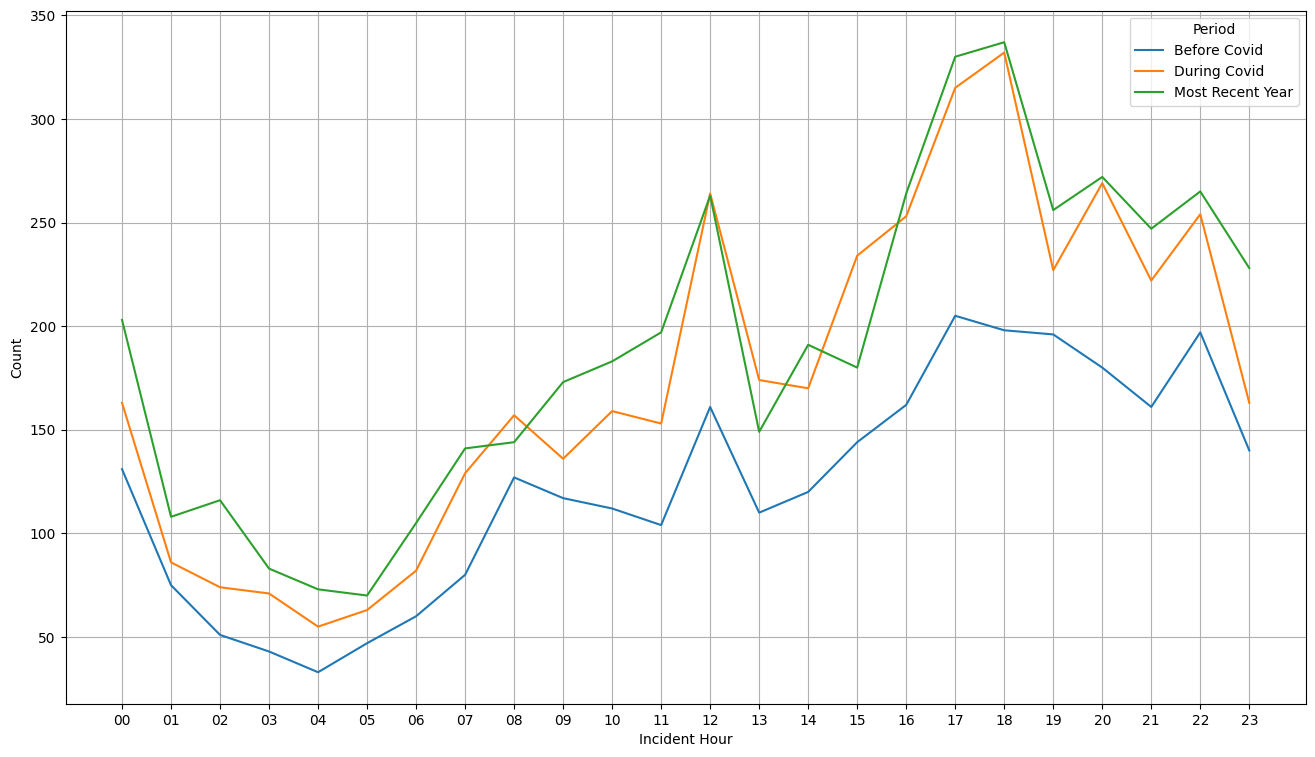

In [59]:
plt.figure(figsize = (16,9))
df = motor_theft[motor_theft['Analysis Neighborhood'].isin(top_ten_mt['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period', hue_order = ['Before Covid', 'During Covid','Most Recent Year'])
plt.grid()
plt.show()

## Pickpockets

In [60]:
pickpocket = sfpd.loc[sfpd['Incident Subcategory'] == 'Larceny Theft - Pickpocket']
pickpocket = pickpocket.loc[(sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [61]:
pickpocket_before = pickpocket.loc[(pickpocket['Incident Date'].between(beforefore,covid_starts))]
pickpocket_now = pickpocket.loc[(pickpocket['Incident Date'].between(year_ago,today))]
pickpocket_change = pd.DataFrame()

pickpocket_change['Year Before Covid'] = pickpocket_before['Analysis Neighborhood'].value_counts()
pickpocket_change['Last Year'] = pickpocket_now['Analysis Neighborhood'].value_counts()

pickpocket_change.loc['Total'] = pickpocket_change.sum()

pickpocket_change['% Change'] = ((pickpocket_change['Last Year'] - pickpocket_change['Year Before Covid'])/
                             pickpocket_change['Year Before Covid'])*100
pickpocket_change['Portion of City Before (%)'] = (pickpocket_before['Analysis Neighborhood'].value_counts()
                               /pickpocket_before['Analysis Neighborhood'].value_counts().sum())*100
pickpocket_change['Portion of City in the Last Year (%)'] = (pickpocket_now['Analysis Neighborhood'].value_counts()
                               /pickpocket_now['Analysis Neighborhood'].value_counts().sum())*100
pickpocket_change

Year Before Covid  Last Year  % Change  \
Financial District/South Beach              164.0       54.0    -67.07   
Tenderloin                                   93.0       67.0    -27.96   
South of Market                              67.0       37.0    -44.78   
Mission                                      62.0       43.0    -30.65   
North Beach                                  59.0       20.0    -66.10   
Chinatown                                    46.0       38.0    -17.39   
Nob Hill                                     42.0       14.0    -66.67   
Marina                                       36.0       15.0    -58.33   
Castro/Upper Market                          33.0       18.0    -45.45   
Western Addition                             24.0       13.0    -45.83   
Golden Gate Park                             13.0        4.0    -69.23   
Japantown                                    12.0        5.0    -58.33   
Lone Mountain/USF                            12.0        3.0    -75.00   
Inner Richmond                               10.0        4.0    -60.00   
Outer Richmond                                6.0        2.0    -66.67   
West of Twin Peaks                            4.0        1.0    -75.00   
Excelsior                                     4.0        3.0    -25.00   
Russian Hill                                  4.0        2.0    -50.00   
Hayes Valley                                  4.0        2.0    -50.00   
Bayview Hunters Point                         3.0       14.0    366.67   
Outer Mission                                 3.0        2.0    -33.33   
Mission Bay                                   3.0        3.0      0.00   
Glen Park                                     2.0        NaN       NaN   
Portola                                       2.0        3.0     50.00   
Haight Ashbury                                2.0        1.0    -50.00   
Pacific Heights                               2.0        1.0    -50.00   
Sunset/Parkside                               2.0        3.0     50.00   
No Neighborhood Data                          2.0        NaN       NaN   
Lakeshore                                     2.0        3.0     50.00   
Noe Valley                                    1.0        NaN       NaN   
Inner Sunset                                  1.0        3.0    200.00   
Potrero Hill                                  1.0        1.0      0.00   
Bernal Heights                                1.0        NaN       NaN   
Presidio Heights                              1.0        1.0      0.00   
Oceanview/Merced/Ingleside                    1.0        NaN       NaN   
Total                                       724.0      380.0    -47.51   

                                Portion of City Before (%)  \
Financial District/South Beach                       22.65   
Tenderloin                                           12.85   
South of Market                                       9.25   
Mission                                               8.56   
North Beach                                           8.15   
Chinatown                                             6.35   
Nob Hill                                              5.80   
Marina                                                4.97   
Castro/Upper Market                                   4.56   
Western Addition                                      3.31   
Golden Gate Park                                      1.80   
Japantown                                             1.66   
Lone Mountain/USF                                     1.66   
Inner Richmond                                        1.38   
Outer Richmond                                        0.83   
West of Twin Peaks                                    0.55   
Excelsior                                             0.55   
Russian Hill                                          0.55   
Hayes Valley                                          0.55   
Bayview Hunters Point                                

In [62]:
# most pickpockets
top_ten_pp = (pickpocket.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_pp = top_ten_pp.iloc[0:10,:]
top_ten_pp.head(10)

Analysis Neighborhood  count
0  Financial District/South Beach    228
1                      Tenderloin    190
2                         Mission    111
3                 South of Market    109
4                       Chinatown     91
5                     North Beach     82
6                        Nob Hill     57
7             Castro/Upper Market     56
8                          Marina     52
9                Western Addition     39

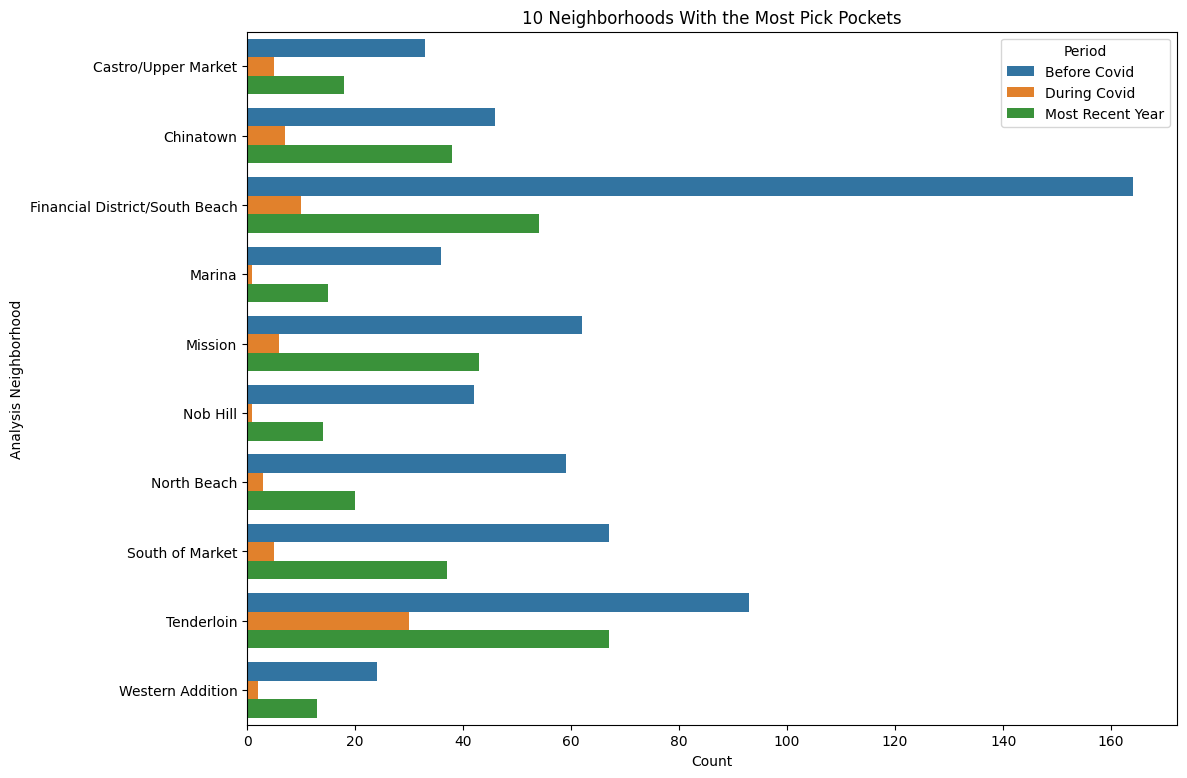

In [63]:
plt.figure(figsize = (12,9))
df = pickpocket[pickpocket['Analysis Neighborhood'].isin(top_ten_pp['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            errorbar=None,
            data=df).set(title = '10 Neighborhoods With the Most Pick Pockets')
plt.show()

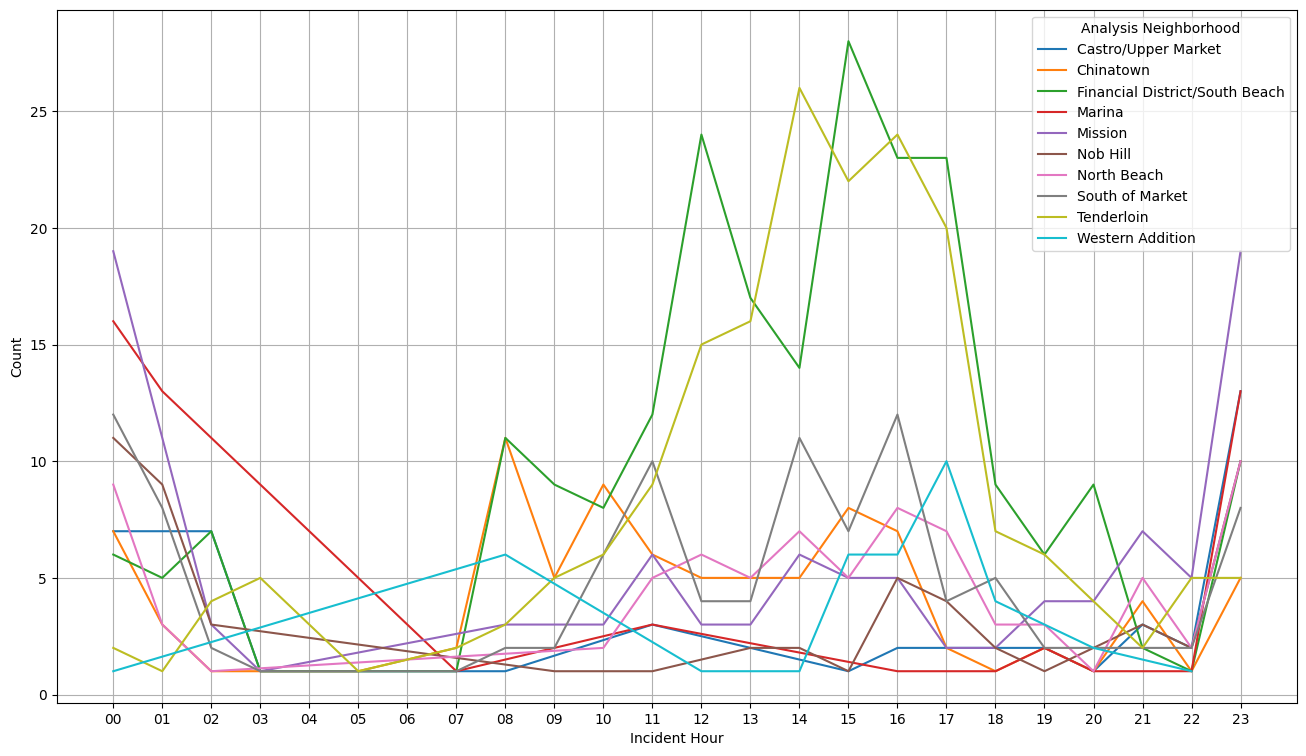

In [64]:
plt.figure(figsize = (16,9))
df = pickpocket[pickpocket['Analysis Neighborhood'].isin(top_ten_pp['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.grid()
plt.show()

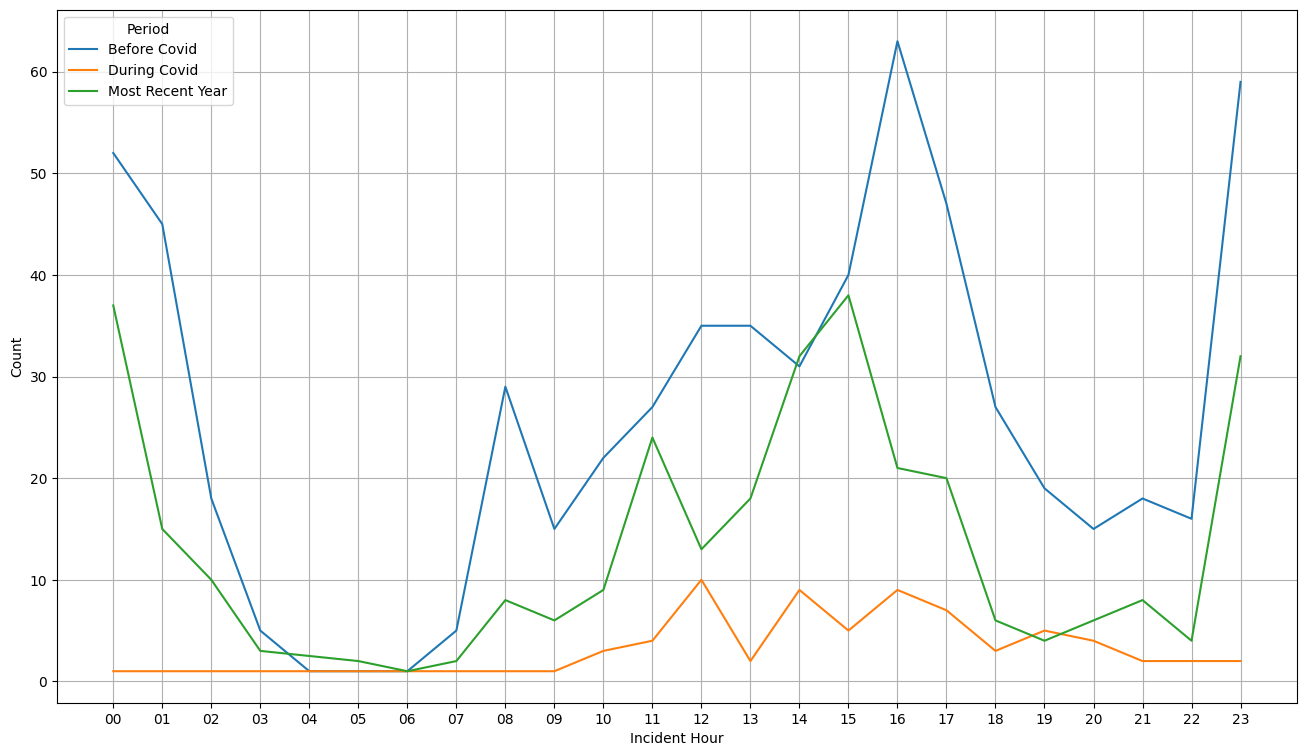

In [65]:
plt.figure(figsize = (16,9))
df = pickpocket[pickpocket['Analysis Neighborhood'].isin(top_ten_pp['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period')
plt.grid()
plt.show()

## Robbery

In [66]:
robbery = sfpd.loc[sfpd['Incident Category'] == 'Robbery']
robbery = robbery.loc[(sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [67]:
robbery_before = robbery.loc[(robbery['Incident Date'].between(beforefore,covid_starts))]
robbery_now = robbery.loc[(robbery['Incident Date'].between(year_ago,today))]
robbery_change = pd.DataFrame()

robbery_change['Year Before Covid'] = robbery_before['Analysis Neighborhood'].value_counts()
robbery_change['Last Year'] = robbery_now['Analysis Neighborhood'].value_counts()

robbery_change.loc['Total'] = robbery_change.sum()

robbery_change['% Change'] = ((robbery_change['Last Year'] - robbery_change['Year Before Covid'])/
                             robbery_change['Year Before Covid'])*100
robbery_change['Portion of City Before (%)'] = (robbery_before['Analysis Neighborhood'].value_counts()
                               /robbery_before['Analysis Neighborhood'].value_counts().sum())*100
robbery_change['Portion of City in the Last Year (%)'] = (robbery_now['Analysis Neighborhood'].value_counts()
                               /robbery_now['Analysis Neighborhood'].value_counts().sum())*100
robbery_change

Year Before Covid  Last Year  % Change  \
Mission                                     495.0      450.0     -9.09   
Tenderloin                                  457.0      357.0    -21.88   
Financial District/South Beach              439.0      227.0    -48.29   
South of Market                             327.0      294.0    -10.09   
Bayview Hunters Point                       305.0      209.0    -31.48   
Western Addition                            129.0      123.0     -4.65   
Nob Hill                                    127.0       63.0    -50.39   
Portola                                     100.0       74.0    -26.00   
Excelsior                                    95.0       87.0     -8.42   
North Beach                                  86.0       80.0     -6.98   
Outer Mission                                86.0       41.0    -52.33   
Castro/Upper Market                          77.0       35.0    -54.55   
Chinatown                                    76.0       50.0    -34.21   
Bernal Heights                               76.0      100.0     31.58   
Visitacion Valley                            63.0       29.0    -53.97   
West of Twin Peaks                           61.0       44.0    -27.87   
Sunset/Parkside                              60.0       54.0    -10.00   
Hayes Valley                                 53.0       51.0     -3.77   
Russian Hill                                 49.0       39.0    -20.41   
Lone Mountain/USF                            40.0       45.0     12.50   
Marina                                       39.0       61.0     56.41   
Mission Bay                                  38.0       36.0     -5.26   
Outer Richmond                               37.0       41.0     10.81   
Oceanview/Merced/Ingleside                   36.0       22.0    -38.89   
Potrero Hill                                 32.0       17.0    -46.88   
Pacific Heights                              29.0       20.0    -31.03   
No Neighborhood Data                         28.0       22.0    -21.43   
Lakeshore                                    27.0       35.0     29.63   
Haight Ashbury                               25.0       19.0    -24.00   
Japantown                                    22.0       26.0     18.18   
Golden Gate Park                             20.0       13.0    -35.00   
Noe Valley                                   16.0       15.0     -6.25   
Presidio Heights                             15.0        4.0    -73.33   
Inner Richmond                               14.0       40.0    185.71   
Inner Sunset                                 11.0       15.0     36.36   
McLaren Park                                 10.0        9.0    -10.00   
Treasure Island                               6.0       10.0     66.67   
Glen Park                                     5.0       17.0    240.00   
Twin Peaks                                    5.0        4.0    -20.00   
Seacliff                                      2.0        NaN       NaN   
Presidio                                      1.0        2.0    100.00   
Total                                      3619.0     2880.0    -20.42   

                                Portion of City Before (%)  \
Mission                                              13.68   
Tenderloin                                           12.63   
Financial District/South Beach                       12.13   
South of Market                                       9.04   
Bayview Hunters Point                                 8.43   
Western Addition                                      3.56   
Nob Hill                                              3.51   
Portola                                               2.76   
Excelsior                                             2.63   
North Beach                                           2.38   
Outer Mission                                         2.38   
Castro/Upper Market                                   2.13   
Chinatown                                  

In [68]:
top_ten_robbery = (robbery.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_robbery = top_ten_robbery.iloc[0:10,:]

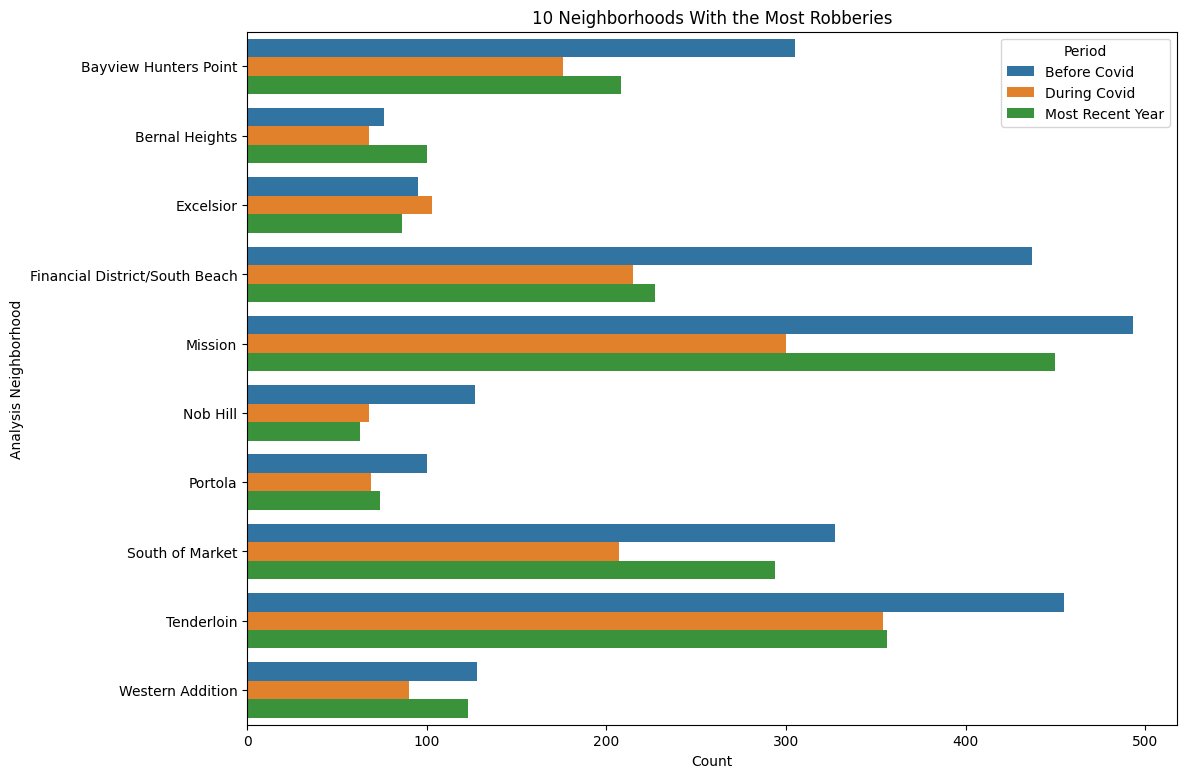

In [69]:
plt.figure(figsize = (12,9))
df = robbery[robbery['Analysis Neighborhood'].isin(top_ten_robbery['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            data=df).set(title = '10 Neighborhoods With the Most Robberies')
plt.show()

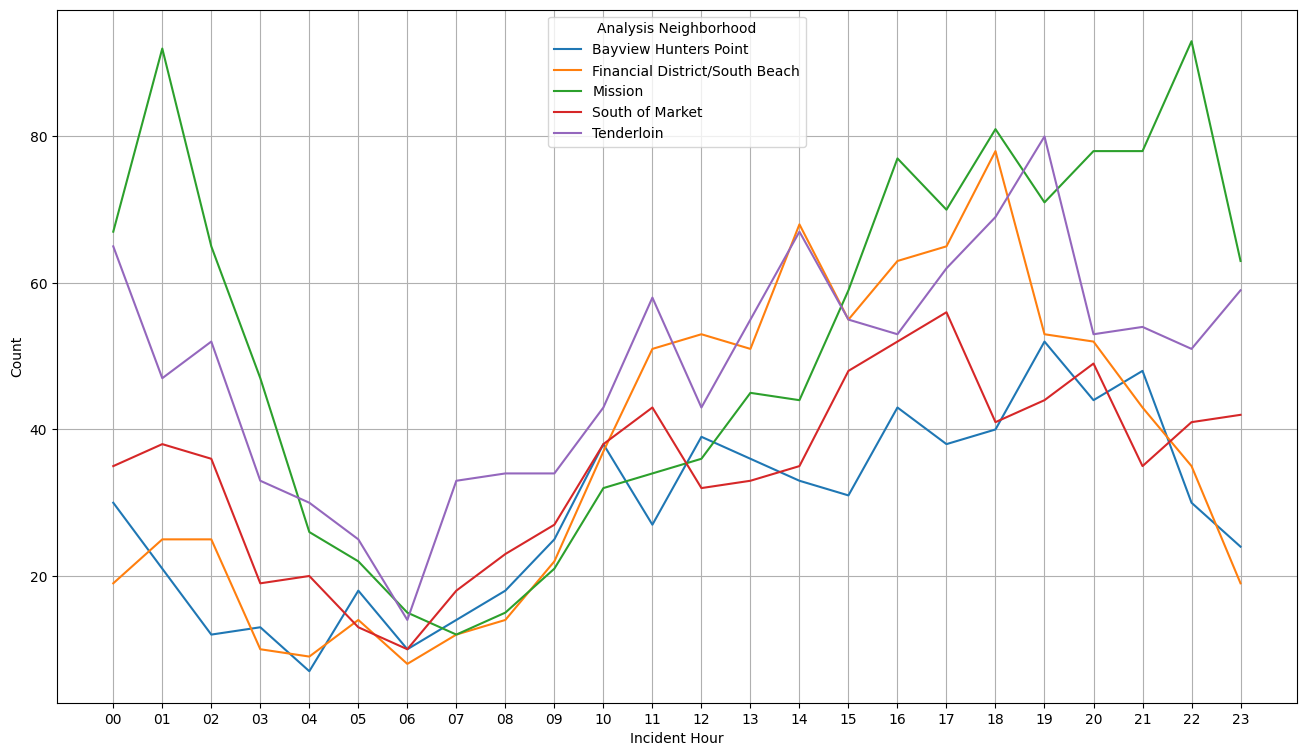

In [70]:
plt.figure(figsize = (16,9))
df = robbery[robbery['Analysis Neighborhood'].isin(top_ten_robbery['Analysis Neighborhood'][0:5])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.grid()
plt.show()

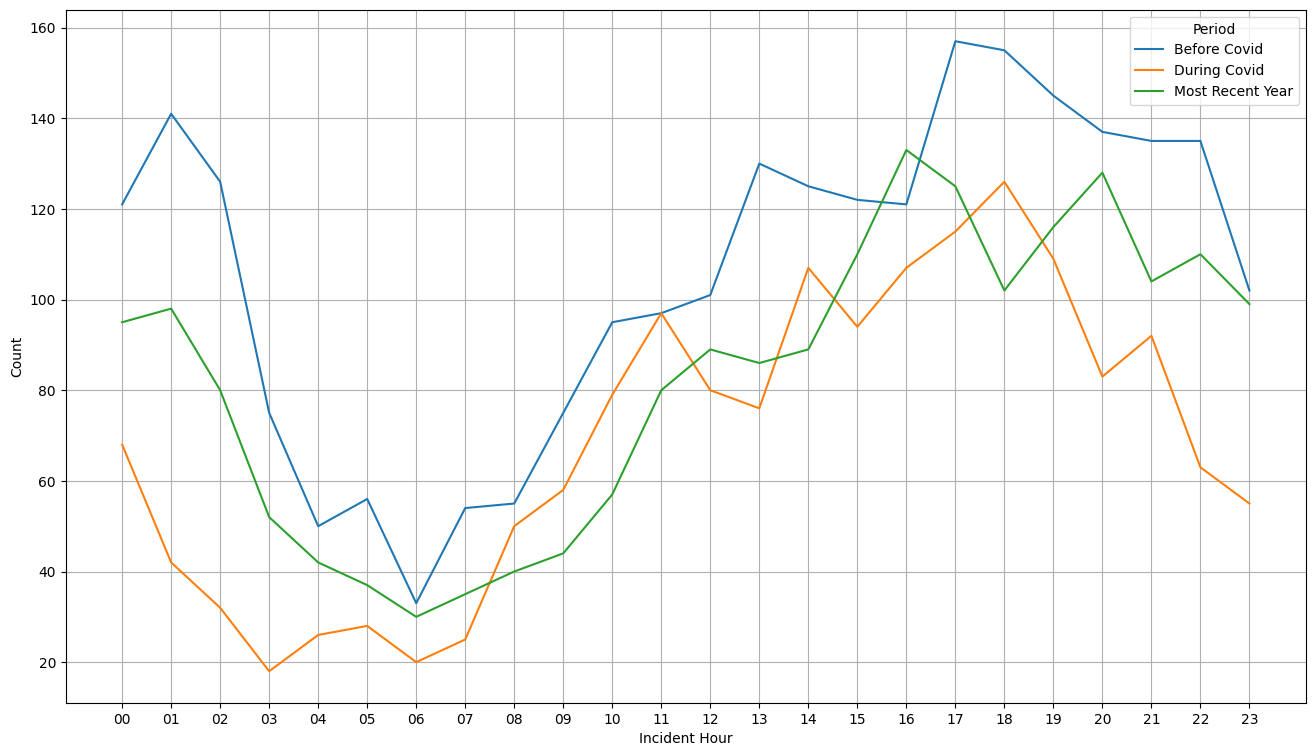

In [71]:
plt.figure(figsize = (16,9))
df = robbery[robbery['Analysis Neighborhood'].isin(top_ten_robbery['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period', hue_order = ['Before Covid', 'During Covid','Most Recent Year'])
plt.grid()
plt.show()

## Shoplifting

In [72]:
shoplifting = sfpd.loc[sfpd['Incident Subcategory'] == 'Larceny Theft - Shoplifting']
shoplifting = shoplifting.loc[(sfpd['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [73]:
shoplifting_before = shoplifting.loc[(shoplifting['Incident Date'].between(beforefore,covid_starts))]
shoplifting_now = shoplifting.loc[(shoplifting['Incident Date'].between(year_ago,today))]
shoplifting_change = pd.DataFrame()

shoplifting_change['Year Before Covid'] = shoplifting_before['Analysis Neighborhood'].value_counts()
shoplifting_change['Last Year'] = shoplifting_now['Analysis Neighborhood'].value_counts()

shoplifting_change.loc['Total'] = shoplifting_change.sum()

shoplifting_change['% Change'] = ((shoplifting_change['Last Year'] - shoplifting_change['Year Before Covid'])/
                             shoplifting_change['Year Before Covid'])*100
shoplifting_change['Portion of City Before (%)'] = (shoplifting_before['Analysis Neighborhood'].value_counts()
                               /shoplifting_before['Analysis Neighborhood'].value_counts().sum())*100
shoplifting_change['Portion of City in the Last Year (%)'] = (shoplifting_now['Analysis Neighborhood'].value_counts()
                               /shoplifting_now['Analysis Neighborhood'].value_counts().sum())*100
shoplifting_change

Year Before Covid  Last Year  % Change  \
Financial District/South Beach              921.0      837.0     -9.12   
Tenderloin                                  560.0      404.0    -27.86   
South of Market                             153.0      215.0     40.52   
Lakeshore                                    96.0      126.0     31.25   
Mission                                      93.0      139.0     49.46   
Pacific Heights                              69.0       47.0    -31.88   
Chinatown                                    64.0       30.0    -53.12   
Nob Hill                                     57.0       41.0    -28.07   
Sunset/Parkside                              55.0      106.0     92.73   
North Beach                                  50.0       34.0    -32.00   
Presidio Heights                             50.0       42.0    -16.00   
Lone Mountain/USF                            48.0       23.0    -52.08   
Portola                                      48.0        8.0    -83.33   
West of Twin Peaks                           45.0       57.0     26.67   
Western Addition                             44.0       51.0     15.91   
Russian Hill                                 44.0       27.0    -38.64   
Marina                                       41.0       73.0     78.05   
Excelsior                                    39.0        2.0    -94.87   
Castro/Upper Market                          35.0       43.0     22.86   
Outer Richmond                               30.0       65.0    116.67   
Hayes Valley                                 26.0       41.0     57.69   
Bayview Hunters Point                        25.0       30.0     20.00   
Bernal Heights                               25.0       94.0    276.00   
Inner Richmond                               22.0       43.0     95.45   
Inner Sunset                                 18.0        8.0    -55.56   
Haight Ashbury                               16.0        3.0    -81.25   
Noe Valley                                   16.0       12.0    -25.00   
Mission Bay                                  13.0       11.0    -15.38   
Japantown                                     7.0        5.0    -28.57   
Oceanview/Merced/Ingleside                    6.0        1.0    -83.33   
Visitacion Valley                             5.0        2.0    -60.00   
Potrero Hill                                  5.0        1.0    -80.00   
Outer Mission                                 4.0       82.0   1950.00   
No Neighborhood Data                          4.0        4.0      0.00   
Golden Gate Park                              3.0        1.0    -66.67   
Glen Park                                     3.0       20.0    566.67   
Treasure Island                               1.0        NaN       NaN   
Total                                      2741.0     2728.0     -0.47   

                                Portion of City Before (%)  \
Financial District/South Beach                       33.60   
Tenderloin                                           20.43   
South of Market                                       5.58   
Lakeshore                                             3.50   
Mission                                               3.39   
Pacific Heights                                       2.52   
Chinatown                                             2.33   
Nob Hill                                              2.08   
Sunset/Parkside                                       2.01   
North Beach                                           1.82   
Presidio Heights                                      1.82   
Lone Mountain/USF                                     1.75   
Portola                                               1.75   
West of Twin Peaks                                    1.64   
Western Addition                                      1.61   
Russian Hill                                          1.61   
Marina                                                1.50   
Excelsior                    

In [74]:
# most shoplifting
top_ten_shoplifting = (shoplifting.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_shoplifting = top_ten_shoplifting.iloc[0:10,:]

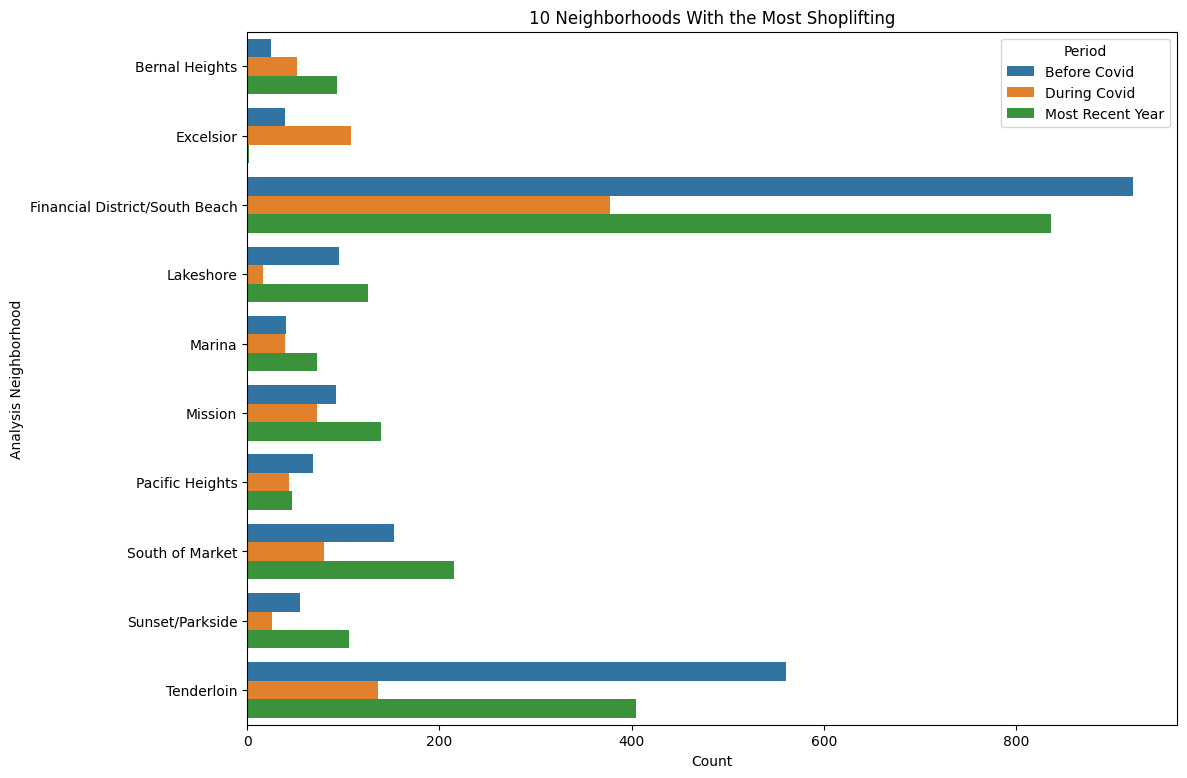

In [75]:
plt.figure(figsize = (12,9))
df = shoplifting[shoplifting['Analysis Neighborhood'].isin(top_ten_shoplifting['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            data=df).set(title = '10 Neighborhoods With the Most Shoplifting')
plt.show()

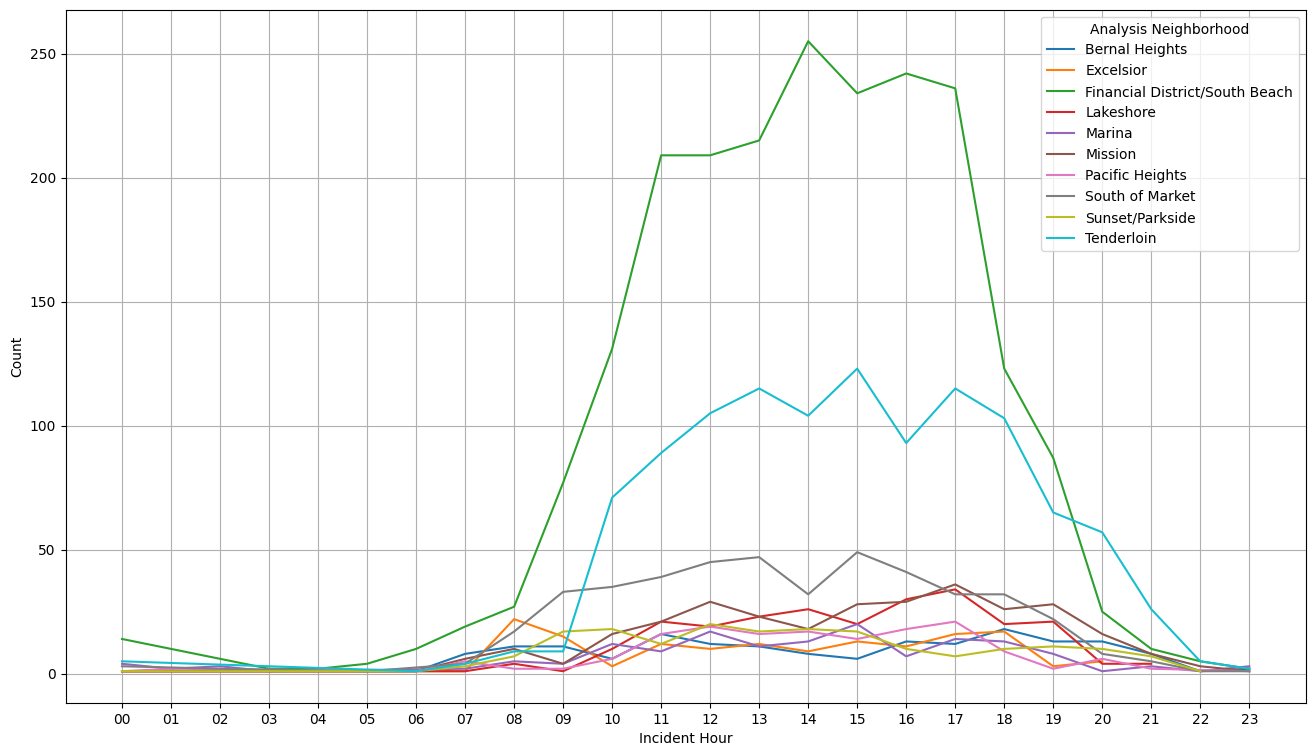

In [76]:
plt.figure(figsize = (16,9))
df = shoplifting[shoplifting['Analysis Neighborhood'].isin(top_ten_shoplifting['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.grid()
plt.show()

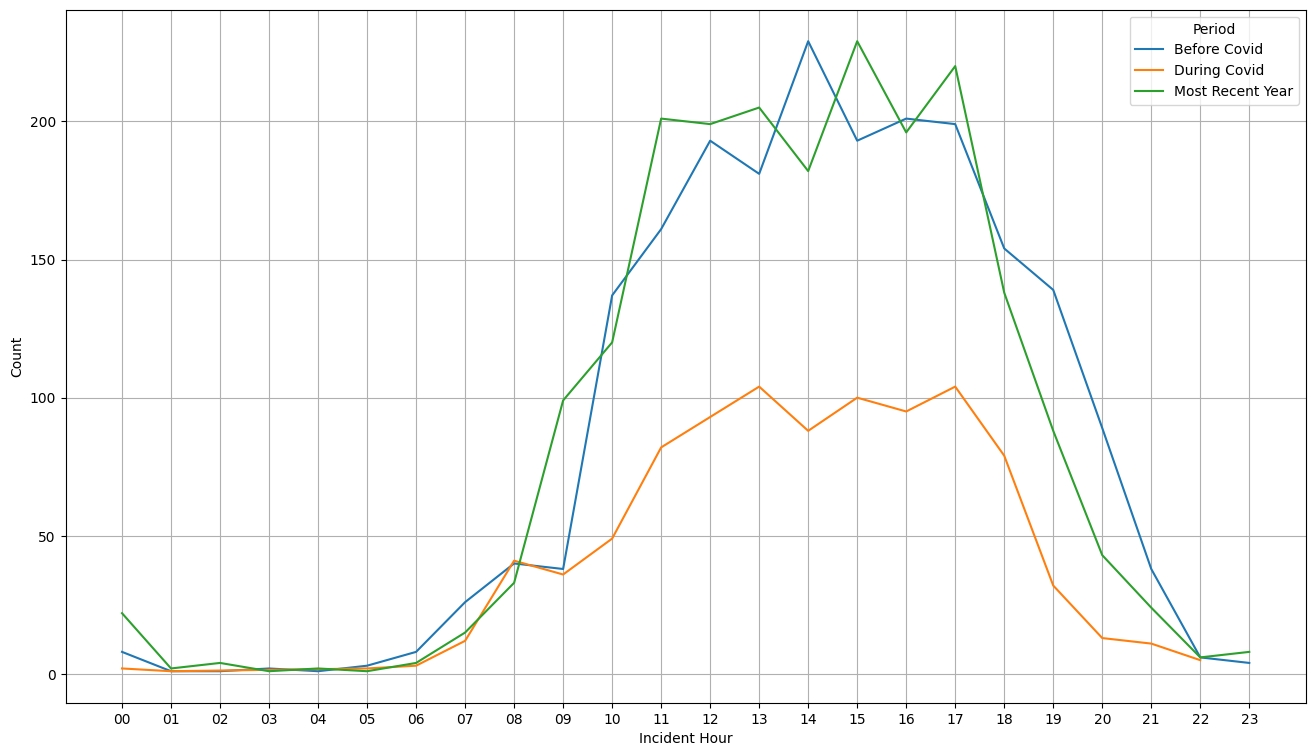

In [77]:
plt.figure(figsize = (16,9))
df = shoplifting[shoplifting['Analysis Neighborhood'].isin(top_ten_shoplifting['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period', hue_order = ['Before Covid', 'During Covid','Most Recent Year'])
plt.grid()
plt.show()

## Vandalism

In [78]:
malicious_mischief = sfpd.loc[sfpd['Incident Category'] == 'Malicious Mischief']
malicious_mischief = malicious_mischief.loc[(malicious_mischief['Incident Date'].between(beforefore,covid_ends) |
                                (sfpd['Incident Date'].between(year_ago,today)))]

In [79]:
malicious_mischief_before = malicious_mischief.loc[(malicious_mischief['Incident Date'].between(beforefore,covid_starts))]
malicious_mischief_now = malicious_mischief.loc[(malicious_mischief['Incident Date'].between(year_ago,today))]
malicious_mischief_change = pd.DataFrame()

malicious_mischief_change['Year Before Covid'] = malicious_mischief_before['Analysis Neighborhood'].value_counts()
malicious_mischief_change['Last Year'] = malicious_mischief_now['Analysis Neighborhood'].value_counts()

malicious_mischief_change.loc['Total'] = malicious_mischief_change.sum()

malicious_mischief_change['% Change'] = ((malicious_mischief_change['Last Year'] - malicious_mischief_change['Year Before Covid'])/
                             malicious_mischief_change['Year Before Covid'])*100
malicious_mischief_change['Portion of City Before (%)'] = (malicious_mischief_before['Analysis Neighborhood'].value_counts()
                               /malicious_mischief_before['Analysis Neighborhood'].value_counts().sum())*100
malicious_mischief_change['Portion of City in the Last Year (%)'] = (malicious_mischief_now['Analysis Neighborhood'].value_counts()
                               /malicious_mischief_now['Analysis Neighborhood'].value_counts().sum())*100
malicious_mischief_change

Year Before Covid  Last Year  % Change  \
Mission                                       873       1039     19.01   
Financial District/South Beach                861        665    -22.76   
South of Market                               679        641     -5.60   
Bayview Hunters Point                         599        607      1.34   
Tenderloin                                    535        614     14.77   
No Neighborhood Data                          433        325    -24.94   
Hayes Valley                                  293        265     -9.56   
Western Addition                              293        310      5.80   
Nob Hill                                      291        306      5.15   
North Beach                                   290        374     28.97   
Castro/Upper Market                           275        245    -10.91   
Sunset/Parkside                               250        253      1.20   
Marina                                        223        233      4.48   
Outer Richmond                                220        218     -0.91   
West of Twin Peaks                            216        186    -13.89   
Russian Hill                                  205        235     14.63   
Bernal Heights                                204        194     -4.90   
Chinatown                                     199        178    -10.55   
Pacific Heights                               185        163    -11.89   
Potrero Hill                                  172        138    -19.77   
Excelsior                                     158        146     -7.59   
Inner Sunset                                  151        131    -13.25   
Visitacion Valley                             149         84    -43.62   
Outer Mission                                 139        125    -10.07   
Haight Ashbury                                130        122     -6.15   
Lakeshore                                     120        117     -2.50   
Inner Richmond                                118        136     15.25   
Portola                                       110        116      5.45   
Mission Bay                                   110        132     20.00   
Oceanview/Merced/Ingleside                    108        119     10.19   
Lone Mountain/USF                             107        106     -0.93   
Noe Valley                                    106         91    -14.15   
Japantown                                     102        125     22.55   
Golden Gate Park                               97         77    -20.62   
Twin Peaks                                     51         47     -7.84   
Glen Park                                      49         48     -2.04   
Treasure Island                                45         52     15.56   
Presidio Heights                               42         56     33.33   
Lincoln Park                                   21          9    -57.14   
Presidio                                       16          8    -50.00   
McLaren Park                                    7         12     71.43   
Seacliff                                        7          5    -28.57   
Total                                        9239       9053     -2.01   

                                Portion of City Before (%)  \
Mission                                               9.45   
Financial District/South Beach                        9.32   
South of Market                                       7.35   
Bayview Hunters Point                                 6.48   
Tenderloin                                            5.79   
No Neighborhood Data                                  4.69   
Hayes Valley                                          3.17   
Western Addition                                      3.17   
Nob Hill                                              3.15   
North Beach                                           3.14   
Castro/Upper Market                                   2.98   
Sunset/Parkside                

In [80]:
top_ten_mm = (malicious_mischief.groupby(['Analysis Neighborhood'])
           .agg(count=('Analysis Neighborhood', 'count'))
           .sort_values(by='count',ascending = False)
           .reset_index())
top_ten_mm = top_ten_mm.loc[top_ten_mm['Analysis Neighborhood'] != 'No Neighborhood Data']
top_ten_mm = top_ten_mm.iloc[0:10,:]

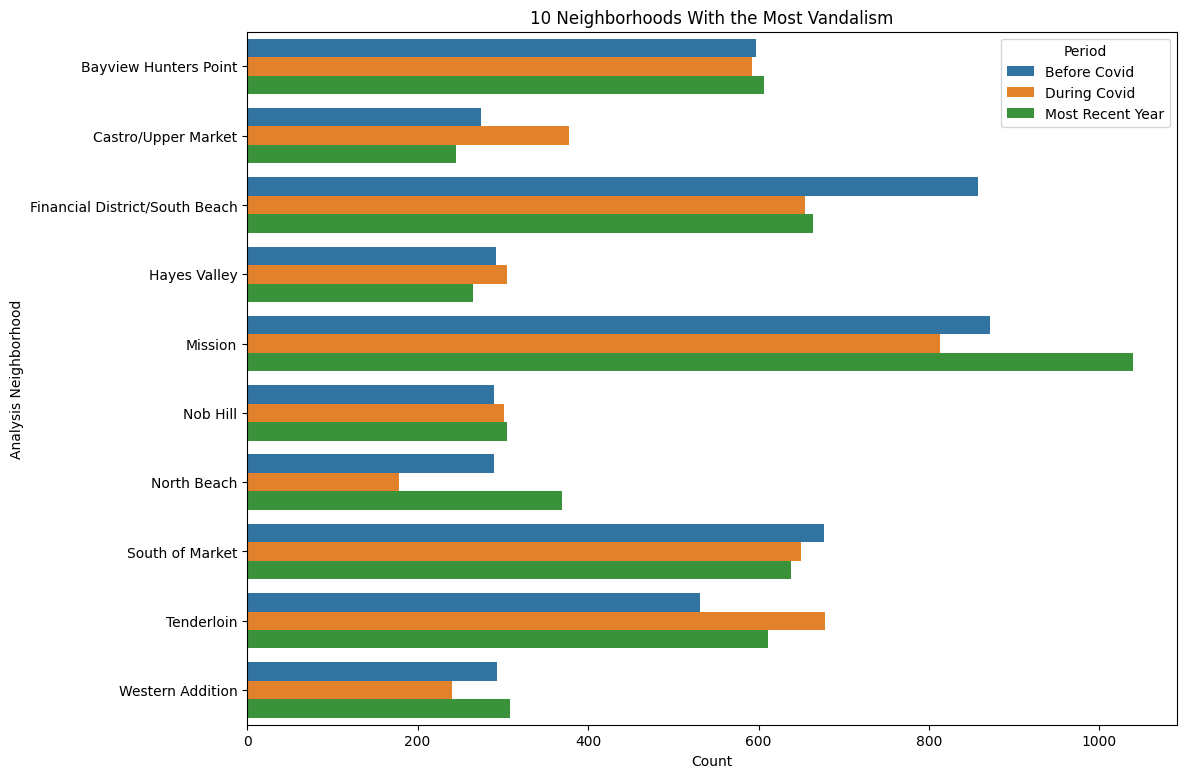

In [81]:
plt.figure(figsize = (12,9))
df = malicious_mischief[malicious_mischief['Analysis Neighborhood'].isin(top_ten_mm['Analysis Neighborhood'])]
df = df.groupby(['Analysis Neighborhood','Period']).agg(Count = ("Analysis Neighborhood", 'count'))
df = df.reset_index()
sns.barplot(y="Analysis Neighborhood",
            x="Count",
            hue="Period",
            errorbar=None,
            data=df).set(title = '10 Neighborhoods With the Most Vandalism')
plt.show()

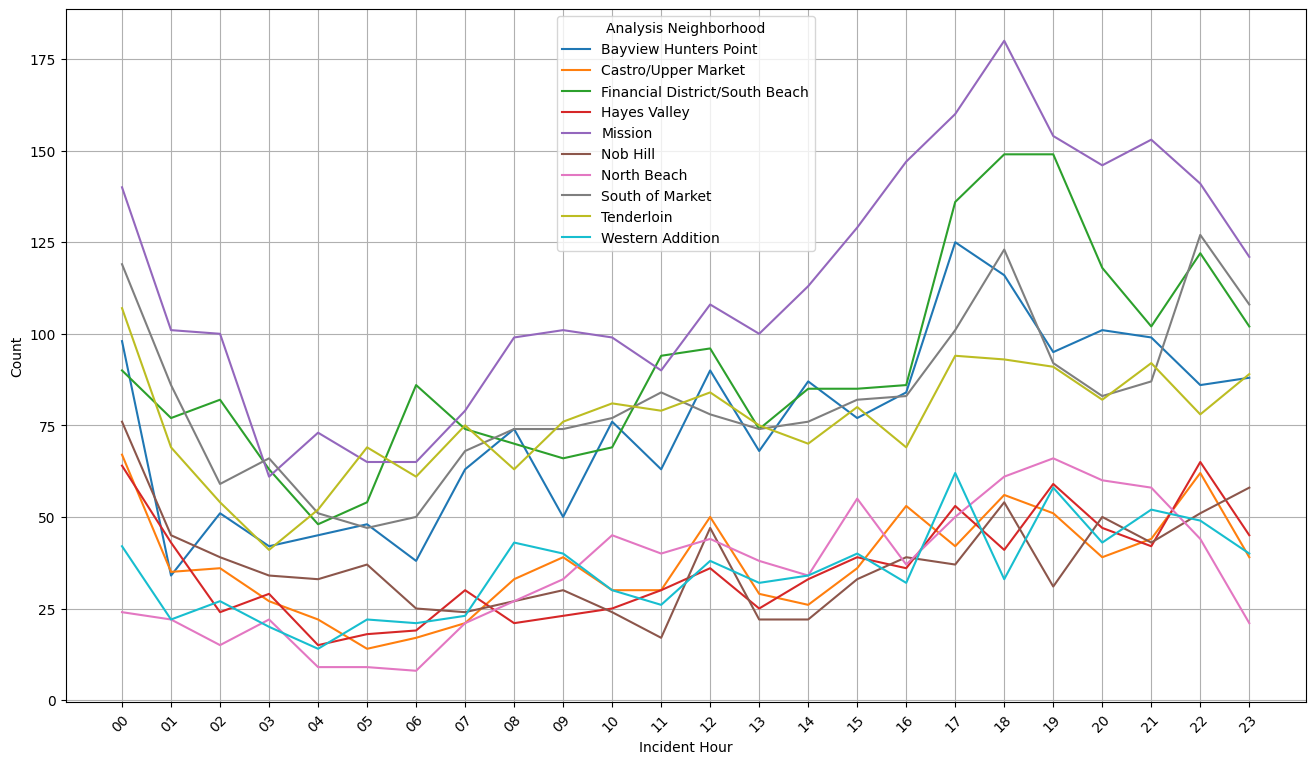

In [82]:
plt.figure(figsize = (16,9))
df = malicious_mischief[malicious_mischief['Analysis Neighborhood'].isin(top_ten_mm['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Analysis Neighborhood',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Analysis Neighborhood')
plt.xticks(rotation = 45, ha="right", rotation_mode="anchor")
plt.grid()
plt.show()

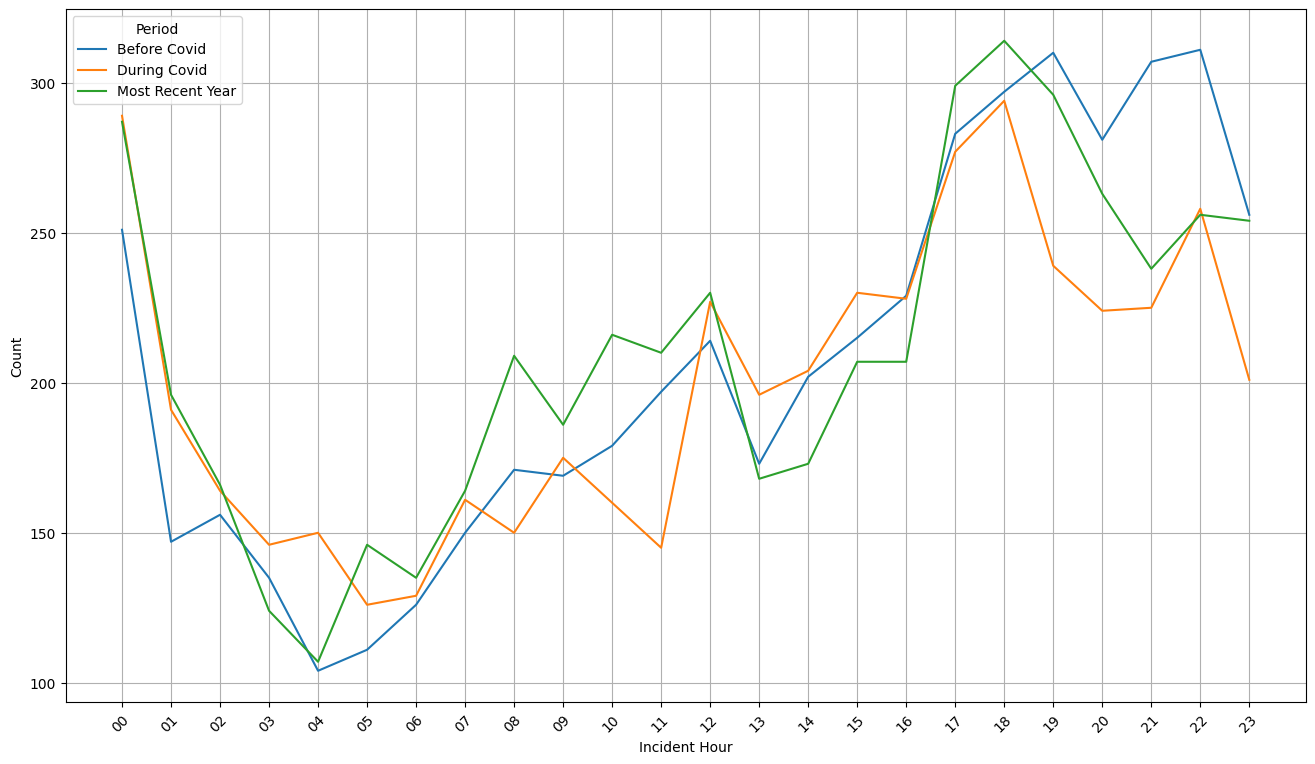

In [83]:
plt.figure(figsize = (16,9))
df = malicious_mischief[malicious_mischief['Analysis Neighborhood'].isin(top_ten_mm['Analysis Neighborhood'])]
sns.lineplot(
    data = df.groupby(['Incident Hour','Period',]).size().reset_index(name='Count'), 
    x='Incident Hour', y='Count', hue='Period')
plt.xticks(rotation = 45, ha="right", rotation_mode="anchor")
plt.grid()
plt.show()

# Did police quiet quit?

In [84]:
before_times = pd.DataFrame()
last_year = pd.DataFrame()

before_times = sfpd[sfpd['Incident Date'].between(beforefore,covid_starts)]
last_year = sfpd[sfpd['Incident Date'].between(year_ago,today)]

In [85]:
before_times = before_times.loc[before_times['Filed Online'].isnull()]
last_year = last_year.loc[last_year['Filed Online'].isnull()]

In [86]:
before_times = before_times.drop_duplicates(subset='CAD Number')
last_year = last_year.drop_duplicates(subset='CAD Number')

## Figure out drop rate of reports on dispatch's end

In [87]:
# Percent of missing values from dispatch dataset
sfpd_cad = sfpd.loc[(sfpd['CAD Number'].notnull())]
sfpd_cad = sfpd_cad.drop_duplicates(subset=['CAD Number'])
missing_onview = len(sfpd_cad[sfpd_cad['onview_flag'].isna()])/len(sfpd_cad)

In [88]:
sfpd_cad

Incident Datetime Incident Date Incident Time  Incident Year  \
0      2021-08-03 10:00:00    2021-08-03         10:00           2021   
1      2021-11-23 07:38:00    2021-11-23         07:38           2021   
13     2021-06-20 11:50:00    2021-06-20         23:50           2021   
14     2021-06-17 04:49:00    2021-06-17         16:49           2021   
21     2022-09-13 07:24:00    2022-09-13         19:24           2022   
...                    ...           ...           ...            ...   
707623 2023-03-12 11:10:00    2023-03-12         23:10           2023   
707624 2023-03-13 10:06:00    2023-03-13         10:06           2023   
707626 2023-03-13 02:28:00    2023-03-13         14:28           2023   
707627 2023-03-13 05:30:00    2023-03-13         17:30           2023   
707630 2023-03-12 04:45:00    2023-03-12         16:45           2023   

       Incident Day of Week         Report Datetime  Incident Number  \
0                   Tuesday  2021/08/15 03:40:00 PM        210520957   
1                   Tuesday  2021/11/23 11:14:00 AM        210773093   
13                   Sunday  2021/06/20 11:50:00 PM        210386351   
14                 Thursday  2021/06/17 04:49:00 PM        210378580   
21                  Tuesday  2022/09/13 07:24:00 PM        220625666   
...                     ...                     ...              ...   
707623               Sunday  2023/03/13 05:04:00 PM        230178376   
707624               Monday  2023/03/13 10:10:00 AM        230177221   
707626               Monday  2023/03/13 02:30:00 PM        230177914   
707627               Monday  2023/03/13 07:21:00 PM        230178859   
707630               Sunday  2023/03/13 01:19:00 AM        230176734   

        CAD Number Report Type Code Report Type Description Filed Online  \
0         2.12e+08               II                 Initial          NaN   
1         2.13e+08               II                 Initial          NaN   
13        2.12e+08               II                 Initial          NaN   
14        2.12e+08               II                 Initial          NaN   
21        2.23e+08               II                 Initial          NaN   
...            ...              ...                     ...          ...   
707623    2.31e+08               II                 Initial          NaN   
707624    2.31e+08               II                 Initial          NaN   
707626    2.31e+08               II                 Initial          NaN   
707627    2.31e+08               II                 Initial          NaN   
707630    2.31e+08               VI         Vehicle Initial          NaN   

        Incident Code    Incident Category    Incident Subcategory  \
0                9250                Fraud                   Fraud   
1               26030                Arson                   Arson   
13              51040         Non-Criminal            Non-Criminal   
14              26031                Arson                   Arson   
21              62071              Warrant                   Other   
...               ...                  ...                     ...   
707623          28160   Malicious Mischief               Vandalism   
707624           6244        Larceny Theft  Larceny - From Vehicle   
707626          51040         Non-Criminal            Non-Criminal   
707627          12030      Weapons Offense         Weapons Offense   
707630           7021  Motor Vehicle Theft     Motor Vehicle Theft   

                                     Incident Description      Resolution  \
0                 Fraudulent Use Of Automated Teller Card  Open or Active   
1                                                   Arson  Open or Active   
13                                             Aided Case  Open or Active   
14                                       Arson of Vehicle  Open or Active   
21                                       Probation Search  Open or Active   
...                                                

In [89]:
missing_onview

0.2922774914472153

If there is a CAD number, dispatch is involved. If there is a CAD number on the police's end, there should be corresponding one on the dispatch's end as well. 29% of the CAD numbers on the police's end are missing from dispatch's. I'm curious to see if that 29% is evenly distributed throughout all incidents.

In [90]:
# dataframe to store incidents with value counts of  onview values of nan and not nan
drop_rate = pd.DataFrame()

In [91]:
df = sfpd.dropna(subset = 'CAD Number').drop_duplicates(subset = 'CAD Number')
drop_rate['total w/o cad'] = df['Incident Category'].value_counts()

In [92]:
# onview column
df = sfpd.dropna(subset = 'CAD Number').drop_duplicates(subset = 'CAD Number')
df = df.dropna(subset = 'onview_flag')
drop_rate['w/ onview'] = df['Incident Category'].value_counts()

In [93]:
# no onview column
df = sfpd.dropna(subset = 'CAD Number').drop_duplicates(subset = 'CAD Number')
df = df[df['onview_flag'].isnull()]
drop_rate['w/o onview'] = df['Incident Category'].value_counts()

In [94]:
drop_rate['expected w/o onview'] = drop_rate['total w/o cad']*missing_onview

In [95]:
drop_rate['% from expected'] = ((drop_rate['w/o onview'] - drop_rate['expected w/o onview'])/
                                         drop_rate['expected w/o onview'])*100

In [96]:
drop_rate

total w/o cad  w/ onview  \
Larceny Theft                                         90055      43608   
Non-Criminal                                          35245      27516   
Motor Vehicle Theft                                   30283      15483   
Assault                                               29616      26536   
Burglary                                              29122      27677   
Other Miscellaneous                                   27506      25814   
Malicious Mischief                                    25783      19967   
Recovered Vehicle                                     15685      14062   
Fraud                                                 13630       2315   
Suspicious Occ                                        11868       7800   
Warrant                                               11854      11321   
Missing Person                                        11604       7568   
Robbery                                               10900       9829   
Drug Offense                                           6995       6622   
Lost Property                                          6883       1150   
Disorderly Conduct                                     6707       5295   
Miscellaneous Investigation                            6279       4332   
Other                                                  5579       5548   
Offences Against The Family And Children               5465       4716   
Traffic Violation Arrest                               3163       3056   
Other Offenses                                         3121       2383   
Weapons Offense                                        2757       2594   
Arson                                                  1515       1463   
Weapons Carrying Etc                                   1286       1123   
Forgery And Counterfeiting                             1277        638   
Stolen Property                                        1270       1056   
Courtesy Report                                        1253        438   
Vandalism                                               948        795   
Fire Report                                             881        849   
Traffic Collision                                       875        711   
Civil Sidewalks                                         747        743   
Embezzlement                                            683        425   
Case Closure                                            615        351   
Prostitution                                            585        557   
Sex Offense                                             464        341   
Suicide                                                 229        228   
Vehicle Impounded                                       222        207   
Vehicle Misplaced                                       199        127   
Rape                                                    105         77   
Suspicious                                               80         70   
Human Trafficking (A), Commercial Sex Acts               63         43   
Drug Violation                                           63         49   
Homicide                                                 33         24   
Liquor Laws                                              33         31   
Motor Vehicle Theft?                                     30         20   
Gambling                                                 14          8   
Weapons Offence                                           7          5   
Human Trafficking, Commercial Sex Acts                    3          1   
Human Trafficking (B), Involuntary Servitude              1          1   

                                              w/o onview  expected w/o onview  \
Larceny Theft                                    46447.0             26321.05   
Non-Criminal                                      7729.0             10301.32   
Motor Vehicle Theft                              14800.0              8851.04   
Assault              

If the 29% missing CAD numbers from dispatch's records were random, we would see the expected value match the recorded values of reports that had missing CAD numbers. Instead the differences are almost as high as 184% expected value in a couple instances.

### Police incident reports involving dispatch from 911 calls

In [97]:
before_times = before_times.dropna(subset = 'onview_flag')

In [98]:
# year before covid
(len(before_times[before_times['onview_flag'] == 'N'])/len(before_times))*100

71.96487937942204

In [99]:
last_year = last_year.dropna(subset = 'onview_flag')

In [100]:
# last year
(len(last_year[last_year['onview_flag'] == 'N'])/len(last_year))*100

75.11595276142963

A little more than a 3% increase in 911 initiated police incidents resulting in reports in the last year compared to the same time period before covid. With 29% of incidents missing from the dispatch dataset, that number can be wildly off.